# Software Technology 1 Data Analysis

(Import necessary libraries)

In [860]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

## Reading the Dataset (0.5 pt)
(Reading into a dataframe)

In [861]:
res = './'
df = pd.read_csv(f'{res}Australian Vehicle Prices.csv')

Display the top five rows.

In [862]:
df.head(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


Display the bottom five rows.

In [863]:
df.tail(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


## Problem Statement Definition (0.5 pt)
A number of factors potentially influence vehicle prices.  The current problem is to use machine learning on a variety of different data to accurately predict a vehicle's selling price.

## Target variable identification (0.5 pt)
The target (dependant) variable is the vehicle's selling price ('Price').

## Visualising the distribution of Target variable (1 pt)

Copy warning supression and max row display setting initialisation.

In [864]:
pd.set_option("mode.copy_on_write", True)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 0)
pd.set_option('display.expand_frame_repr', True)

Inspect index, columns and data types.

In [865]:
print(df.index)
print(df.columns)
df.dtypes

RangeIndex(start=0, stop=16734, step=1)
Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')


Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [866]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

Investigate the 1 NaN present in all the columns.

In [867]:
df[df['Brand'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that this is a row where every value is NaN, which will not be useful to us.  Drop said anomaly from the table.

In [868]:
df = df.dropna(subset=['Brand'])

Drop all NaNs present in the 'Price' column from the table - such data cannot be compared.

In [869]:
df = df.dropna(subset=['Price'])
df.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

Investigate types of the columns.

In [870]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

Note how Price is not a pure float when it should be.  Make a copy of the column to be able to compare the main dataset to the edited version (like, in this case, seeing what values were non-numeric).  We will continue to use this for the next little while.

In [871]:
cf = df.copy() # Copy the frame
cf['Price'] = pd.to_numeric(cf['Price'], errors='coerce')
df.loc[cf['Price'].isnull(), 'Price'].unique()

array(['POA'], dtype=object)

In [872]:
cf['Price'].isnull().sum()

50

'POA' (meaning 'Power of Attorney') is essentially simply saying that the price data will only be determined after the customer contacts the seller.  This cannot be used by us and thus such columns should be dropped.  Since we can't compare compare cf to df in the future unless df loses the same rows, we will do this to df as well.

In [873]:
cf = cf.dropna(subset='Price')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset='Price')

First display of data distribution to satisfy above requirement.  We will do another one later after the data has been properly cleaned.

<Axes: >

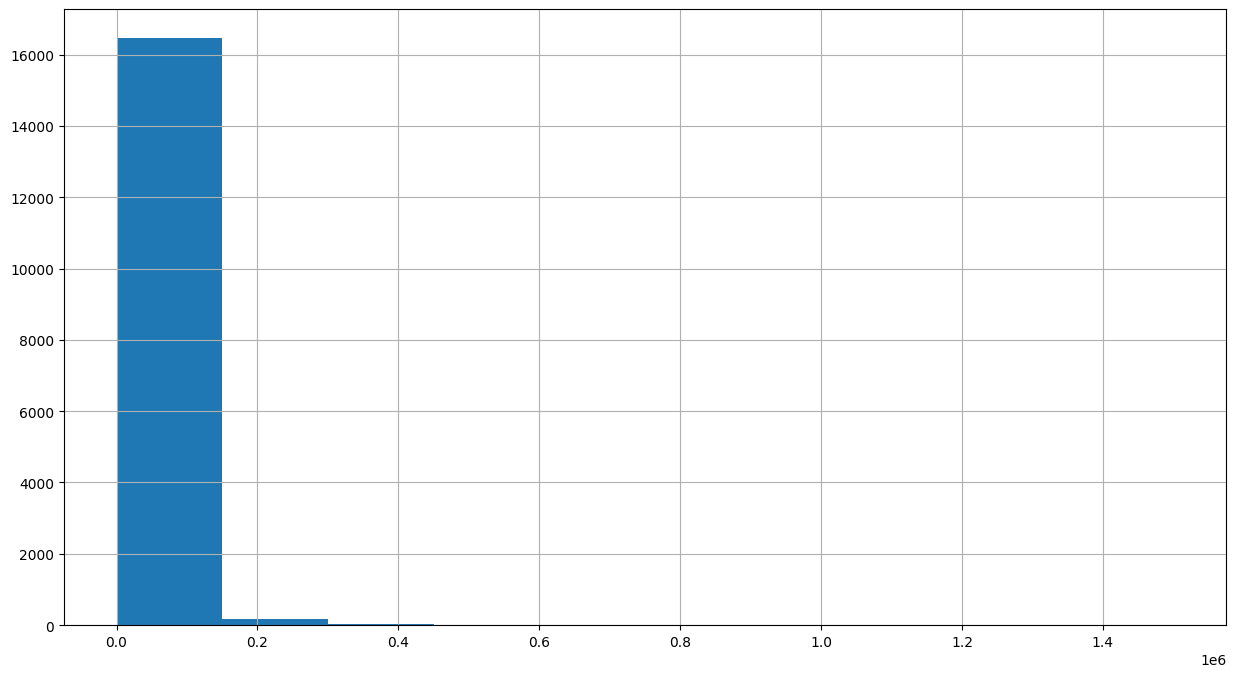

In [874]:
cf['Price'].hist(figsize=(15,8))

## Data exploration at basic level (1 pt) (and removal of outliers and missing values (1 pt), as well as the first part of Data Conversion to numeric values for machine learning/predictive analysis (1 pt))

First, some more basic data summary.

In [875]:
cf.describe()

,Year,Price
count,16681.000000,1.668100e+04
mean,2016.214615,3.730333e+04
std,5.241618,3.717787e+04
min,1940.000000,8.800000e+01
25%,2013.000000,1.899900e+04
50%,2017.000000,2.950000e+04
75%,2020.000000,4.399000e+04
max,2023.000000,1.500000e+06


In [876]:
cf.describe(include='object')

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats
count,16681,16681,16655,16681,16681,16681,16681,16681,16681,16681,16681,16681,16232,16681,16402,15094,14993
unique,76,781,615,8785,3,3,106,5,9,157,14256,832,618,11,10,13,13
top,Toyota,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,-,- / -,White / -,"Minchinbury, NSW",4 cyl,SUV,4 Doors,5 Seats
freq,2782,430,5918,60,14984,14488,3937,6957,6962,1681,449,2830,544,11471,6886,11163,11285


Now, also note how Year is a float (it should be an Int) and everything else, including Price, is an object, all potentially because of the NaN.

Convert obvious types.

In [877]:
cf['Year'] = cf['Year'].astype(int)

cf['Kilometres'] = pd.to_numeric(cf['Kilometres'], errors='coerce')
cf.isna().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres            575
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              279
Doors                1587
Seats                1688
Price                   0
dtype: int64

### Cleaning kilometres

Investigate the 591-entry jump in nulls in the Kilometres column.

In [878]:
allnonintkms = df['Kilometres'][cf['Kilometres'].isnull()]
allnonintkms

1573     -
2036     -
2073     -
2250     -
2373     -
        ..
16629    -
16632    -
16642    -
16651    -
16661    -
Name: Kilometres, Length: 575, dtype: object

See how many types of non-integer values exist under 'Kilometres'.

In [879]:
notintkmsunique = allnonintkms.unique()
notintkmsunique

array(['-', '- / -'], dtype=object)

Check surrounding data of the first (main) type of non-integer value.

In [880]:
df[df['Kilometres'] == notintkmsunique[0]]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
1573,Renault,2023.0,Megane,Macarthur Renault,2023 Renault Megane R.s. Trophy,NEW,Manual,"4 cyl, 1.8 L",Front,-,8.3 L / 100 km,-,Yellow / -,"Narellan, NSW",4 cyl,Hatchback,5 Doors,5 Seats,71490.0
2036,Renault,2023.0,Captur,Macarthur Renault,2023 Renault Captur R.s. Line,NEW,Automatic,"4 cyl, 1.3 L",Front,-,6.6 L / 100 km,-,Grey / Diamond Black,"Narellan, NSW",4 cyl,SUV,4 Doors,4 Seats,43000.0
2073,Renault,2023.0,Captur,Macarthur Renault,2023 Renault Captur R.s. Line,NEW,Automatic,"4 cyl, 1.3 L",Front,-,6.6 L / 100 km,-,Red / -,"Narellan, NSW",4 cyl,SUV,4 Doors,4 Seats,43000.0
2250,Volkswagen,2023.0,Tiguan,Liverpool Volkswagen New Cars,2023 Volkswagen Tiguan 235TSI R,NEW,Automatic,"4 cyl, 2 L",AWD,Premium,8.8 L / 100 km,-,Blue / -,"Liverpool, NSW",4 cyl,SUV,4 Doors,5 Seats,85990.0
2373,Toyota,2002.0,Crown,03 **** ****\n,2002 Toyota Crown Athlete V,USED,Automatic,-,Other,Unleaded,-,-,Black / Grey,"Braeside, VIC",-,NaN,NaN,NaN,24888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16629,Suzuki,2022.0,Swift,Moreton Bay Suzuki - New,2022 Suzuki Swift Sport Navi Turbo,NEW,Manual,"4 cyl, 1.4 L",Front,Unleaded,6.1 L / 100 km,-,Blue / -,"Capalaba, QLD",4 cyl,Hatchback,5 Doors,5 Seats,34690.0
16632,Mazda,2023.0,CX-8,Brighton Mazda New & Demo,2023 Mazda CX-8 G25 Touring (fwd),NEW,Automatic,"4 cyl, 2.5 L",Front,-,8.1 L / 100 km,-,White / Black Leather,"Brighton, VIC",4 cyl,SUV,4 Doors,7 Seats,54725.0
16642,Suzuki,2022.0,Ignis,Moreton Bay Suzuki - New,2022 Suzuki Ignis GL,NEW,Automatic,"4 cyl, 1.2 L",Front,Premium,4.9 L / 100 km,-,Red / -,"Capalaba, QLD",4 cyl,SUV,4 Doors,5 Seats,24485.0
16651,Suzuki,2022.0,Swift,Q Suzuki - New,2022 Suzuki Swift GL S,NEW,Automatic,"4 cyl, 1.2 L",Front,Unleaded,4.8 L / 100 km,-,Grey / -,"Springwood, QLD",4 cyl,Hatchback,5 Doors,5 Seats,27690.0


Investigate the second type of non-integer value.

In [881]:
df[df['Kilometres'] == notintkmsunique[1]]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14765,Renault,2023.0,Arkana,NEW Available to order,2023 Renault Arkana ZEN,NEW,Automatic,"4 cyl, 1.3 L",Front,-,6 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,SUV,4 Doors,5 Seats,37500.0
14767,Toyota,2023.0,HiAce,NEW Available to order,2023 Toyota HiAce Slwb Commuter (12 Seats),NEW,Automatic,"4 cyl, 2.8 L",Rear,Diesel,0 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,People Mover,3 Doors,12 Seats,69760.0
14769,Land,2023.0,Rover,NEW Available to order,2023 Land Rover Defender 90 D250 S (183KW),NEW,Automatic,"6 cyl, 3 L",AWD,Diesel,7.9 L / 100 km,- / -,5 years / Unlimited km,NaN,6 cyl,SUV,3 Doors,5 Seats,97700.0
14771,Mazda,2023.0,6,NEW Available to order,2023 Mazda 6 G25 Sport,NEW,Automatic,"4 cyl, 2.5 L",Front,Unleaded,7 L / 100 km,- / -,5 years / Unlimited km,NaN,4 cyl,Wagon,4 Doors,5 Seats,36840.0
14773,Land,2023.0,Rover,NEW Available to order,2023 Land Rover Defender 130 P500 V8 (368KW),NEW,Automatic,"8 cyl, 5 L",AWD,-,12.7 L / 100 km,- / -,5 years / Unlimited km,NaN,8 cyl,SUV,5 Doors,8 Seats,237900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,Iveco,2023.0,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB4350),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,71559.0
15509,Iveco,2023.0,Daily,NEW Available to order,2023 Iveco Daily E6 35S18V H2 SRW (WB3520L),NEW,Manual,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Commercial,3 Doors,3 Seats,70202.0
15511,Iveco,2023.0,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB3450),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,4 Doors,6 Seats,75789.0
15514,Iveco,2023.0,Daily,NEW Available to order,2023 Iveco Daily E6 70C21 DRW (WB3750),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,- / -,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,83909.0


There appears to be a pattern between the second type of non-integer value and whether the car is new, which isn't there with the first type.  (As an aside, also note how ColourExtInt seems to have warranty information instead of colours.  We won't deal with it at this point, but definitely keep it in mind for future reference, as we will dealt with it.)

In [882]:
df[(df['Kilometres'] == notintkmsunique[1]) & (df['UsedOrNew'] == 'USED')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


As seen above, '-' is a generic value for no information, while '-/-' most likely specifically indicates no kilometers.

Replace instances of '-/-' with 0.

In [883]:
cf.loc[df['Kilometres'] == notintkmsunique[1], 'Kilometres'] = 0.0
cf[df['Kilometres'] == notintkmsunique[1]]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
14765,Renault,2023,Arkana,NEW Available to order,2023 Renault Arkana ZEN,NEW,Automatic,"4 cyl, 1.3 L",Front,-,6 L / 100 km,0.0,5 years / Unlimited km,NaN,4 cyl,SUV,4 Doors,5 Seats,37500.0
14767,Toyota,2023,HiAce,NEW Available to order,2023 Toyota HiAce Slwb Commuter (12 Seats),NEW,Automatic,"4 cyl, 2.8 L",Rear,Diesel,0 L / 100 km,0.0,5 years / Unlimited km,NaN,4 cyl,People Mover,3 Doors,12 Seats,69760.0
14769,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 90 D250 S (183KW),NEW,Automatic,"6 cyl, 3 L",AWD,Diesel,7.9 L / 100 km,0.0,5 years / Unlimited km,NaN,6 cyl,SUV,3 Doors,5 Seats,97700.0
14771,Mazda,2023,6,NEW Available to order,2023 Mazda 6 G25 Sport,NEW,Automatic,"4 cyl, 2.5 L",Front,Unleaded,7 L / 100 km,0.0,5 years / Unlimited km,NaN,4 cyl,Wagon,4 Doors,5 Seats,36840.0
14773,Land,2023,Rover,NEW Available to order,2023 Land Rover Defender 130 P500 V8 (368KW),NEW,Automatic,"8 cyl, 5 L",AWD,-,12.7 L / 100 km,0.0,5 years / Unlimited km,NaN,8 cyl,SUV,5 Doors,8 Seats,237900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15506,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB4350),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,0.0,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,71559.0
15509,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 35S18V H2 SRW (WB3520L),NEW,Manual,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,0.0,"3 years / 200,000 km",NaN,4 cyl,Commercial,3 Doors,3 Seats,70202.0
15511,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 50C18 DRW (WB3450),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,0.0,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,4 Doors,6 Seats,75789.0
15514,Iveco,2023,Daily,NEW Available to order,2023 Iveco Daily E6 70C21 DRW (WB3750),NEW,Automatic,"4 cyl, 3 L",Rear,Diesel,0 L / 100 km,0.0,"3 years / 200,000 km",NaN,4 cyl,Ute / Tray,2 Doors,3 Seats,83909.0


It seems (just below) that the set of data with '-/-' to indicate a new car was collated from a single data set, as there seems to be no Location information and other fields ('ColourExtInt', 'Car/SUV') have unrelated information.  Keep this in mind for later.

In [884]:
cf.loc[(df['Kilometres'] == notintkmsunique[1]) & (-df['Location'].isna())]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


As for the other nulled Kilometres data, we'll just replace entries for New cars with 0 (since that is the most likely value for them) and drop all other entries.

In [885]:
cf.loc[((df['UsedOrNew'] == 'NEW') & (cf['Kilometres'].isnull())),'Kilometres'] = 0
cf[df['UsedOrNew'] == 'NEW']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
22,Volkswagen,2023,Amarok,Alto Volkswagen New Cars,2023 Volkswagen Amarok Style TDI600 4Motion,NEW,Automatic,"6 cyl, 3 L",AWD,Diesel,8.4 L / 100 km,15.0,White / Black,"Blacktown, NSW",6 cyl,Ute / Tray,4 Doors,5 Seats,83887.0
32,Volkswagen,2023,T-Cross,NEW In stock,2023 Volkswagen T-Cross 85TSI DSG FWD Life,NEW,Automatic,-,Front,Premium,-,15.0,White / Black,"Blacktown, NSW",-,Wagon,NaN,NaN,35887.0
71,Volkswagen,2023,Tiguan,Alto Volkswagen New Cars,2023 Volkswagen Tiguan Allspace 132TSI Life,NEW,Automatic,"4 cyl, 2 L",AWD,Premium,8.9 L / 100 km,15.0,Black / Storm Grey,"Blacktown, NSW",4 cyl,SUV,4 Doors,7 Seats,56887.0
390,MG,2023,ZST,Alto Blacktown MG,2023 MG ZST Core,NEW,Automatic,"4 cyl, 1.5 L",Front,-,6.9 L / 100 km,15.0,Red / Black & Grey Cloth,"Blacktown, NSW",4 cyl,SUV,5 Doors,5 Seats,27690.0
455,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS Excite,NEW,Automatic,"4 cyl, 1.5 L",Front,-,7.1 L / 100 km,15.0,Silver / Knight Black Synthetic Leather,"Blacktown, NSW",4 cyl,SUV,4 Doors,5 Seats,24690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16654,Hyundai,2023,Tucson,Brighton Hyundai,2023 Hyundai Tucson N Line (fwd),NEW,Automatic,"4 cyl, 2 L",Front,Unleaded,8.1 L / 100 km,10.0,Red / Black,"Elsternwick, VIC",4 cyl,SUV,4 Doors,5 Seats,44360.0
16661,Hyundai,2023,Kona,Brighton Hyundai,2023 Hyundai Kona N Premium,NEW,Automatic,"4 cyl, 2 L",Front,Premium,9 L / 100 km,0.0,Grey / Black,"Elsternwick, VIC",4 cyl,SUV,4 Doors,5 Seats,57600.0
16699,MG,2023,HS,Brighton MG,2023 MG HS Essence X,NEW,Automatic,"4 cyl, 2 L",AWD,-,9.5 L / 100 km,10.0,White / Black,"Elsternwick, VIC",4 cyl,SUV,4 Doors,5 Seats,40980.0
16700,Renault,2023,Trafic,"Brighton Renault, Suzuki & Nissan New",2023 Renault Trafic L2 LWB PRO,NEW,Automatic,"4 cyl, 2 L",Front,Diesel,6.5 L / 100 km,10.0,White / Black,"Bentleigh, VIC",4 cyl,Commercial,3 Doors,3 Seats,57285.0


In [886]:
cf = cf[cf['Kilometres'].notnull()]
cf["Kilometres"] = pd.to_numeric(cf["Kilometres"], errors="coerce")
cf.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              278
Doors                1585
Seats                1685
Price                   0
dtype: int64

In [887]:
cf.dtypes

Brand                 object
Year                   int64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres           float64
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                float64
dtype: object

### Cleaning mostly numeric columns (Doors, Seats)

Let's now deal with columns which would be numeric if it weren't for a unit of measurement.

From examples above, the valid values in the 'Doors' column seem to be numbers suffixed with ' Doors'.  Check whether there are any exceptions and what they are.

In [888]:
cfwheredoorsnotnull = cf[cf['Doors'].notnull()]
cfwheredoorsnotnull.loc[(-cfwheredoorsnotnull['Doors'].str.contains(r' Doors$')), 'Doors'].unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', ' 8 Seats', ' 2 Seats',
       ' 9 Seats', ' 6 Seats', ' 3 Seats', ' 12 Seats'], dtype=object)

...why is there Seats data in Doors?

Investigate this.  Note that replicating the above with Seats will error as the column has nulls by default.  So...

In [889]:
tf = cf.copy() # temporary copy
tf = tf[-tf['Seats'].isnull()]
tf.loc[-(tf['Seats'].str.contains(r' Seats$')), 'Seats'].unique()

array([], dtype=object)

No unusual values.  Look at Doors again.

In [890]:
tf.loc[-(tf['Doors'].str.contains(r' Doors$')), 'Doors'].unique()

array([], dtype=object)

Notice that Doors with the above restriction is now empty.  What likely happened was there was a data source which had no Doors information and so had its Seats information put into Doors instead, at the sacrifice of Doors.  Discard the temporary dataset copy and move the relevant data over.

In [891]:
del tf

In [892]:
cfwheredoorsnotnull = cf[cf['Doors'].notnull()]
cf.loc[(cf['Doors'].notnull()) & (cfwheredoorsnotnull['Doors'].str.contains(r' Seats$')),'Seats'] = cfwheredoorsnotnull.loc[(cfwheredoorsnotnull['Doors'].str.contains(r' Seats$')),'Doors']
cf.loc[(cf['Doors'].notnull()) & (cf[cf['Doors'].notnull()]['Doors'].str.contains(r' Seats$')),'Doors'] = np.NaN
cf[cf['Doors'].notnull()]['Doors'].str.contains(r' Seats$').sum()

0

In [893]:
cf.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              278
Doors                1655
Seats                1615
Price                   0
dtype: int64

### Stripping columns of  surrounding whitespace

Further processing becomes much easier when we can be sure all columns do not have unnecessary whitespace surrounding the data.

In [894]:
cf = cf.apply(lambda y : pd.Series((lambda x=item : x.strip() if type(x) == str else x)() for item in y))
cf

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000.0,Grey / -,"Rocklea, QLD",-,Commercial,NaN,7 Seats,29500.0
16666,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432.0,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888.0
16667,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165.0,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280.0
16668,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525.0,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888.0


### Replacing effectively null values with null values

Some fields have values such as '-' or 'Unknown' which (particularly by the next step) effectively act as NaN.

In [895]:
cf['FuelType'].unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Other',
       'Electric', 'LPG', 'Leaded'], dtype=object)

In [896]:
(cf['FuelType'] == '-').sum()

632

In [897]:
cf.loc[cf['FuelType'] == '-', 'FuelType'] = np.NaN
(cf['FuelType'] == '-').sum()

0

In [898]:
cf.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType              632
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              278
Doors                1655
Seats                1615
Price                   0
dtype: int64

Test other limited or semi-limited range fields.

In [899]:
columnstocheck = ['UsedOrNew', 'Transmission', 'DriveType', 'BodyType']
for column in columnstocheck:
    print(cf[column].unique())

['DEMO' 'USED' 'NEW']
['Automatic' 'Manual' '-']
['AWD' 'Front' 'Rear' 'Other' '4WD']
['SUV' 'Hatchback' 'Coupe' 'Commercial' nan 'Wagon' 'Ute / Tray' 'Sedan'
 'People Mover' 'Convertible' 'Other']


Test whether more broad and numeric fields have data matching certain effectively null keywords.

In [900]:
columnstocheck = ['Brand', 'Model', 'Title', 'Engine', 'FuelConsumption', 'ColourExtInt', 'Location', 'CylindersinEngine', 'Doors', 'Seats'] # (For why we skipped 'Car/Suv', see the next main heading section)
valuestocheck = ['-', '-/-', '- / -', 'Unknown']
for column in columnstocheck:
    print(f'{column}: {cf.loc[cf[column].isin(valuestocheck), column].notnull().sum()}')

Brand: 0
Model: 0
Title: 0
Engine: 1655
FuelConsumption: 1678
ColourExtInt: 355
Location: 0
CylindersinEngine: 1655
Doors: 0
Seats: 0


Curiously, no column has both effectively null and actually null values.

Of the limited range columns, only 'Transmission' has an effectively null value (we're not counting 'Other' as effectively null).

In [901]:
cf['Transmission'].isin(valuestocheck).sum()

243

In [902]:
cf[cf['Transmission'].isin(valuestocheck)]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
162,Daihatsu,2019,Hijet,02 **** ****,2019 Daihatsu Hijet,USED,-,-,Other,NaN,-,19730.0,Green / Grey,"West Ryde, NSW",-,NaN,NaN,NaN,33888.0
437,Toyota,2006,Estima,USED Dealer ad,2006 Toyota Estima,USED,-,-,Other,NaN,-,122533.0,White / -,"Greenacre, NSW",-,Wagon,NaN,NaN,16990.0
623,Toyota,2017,Corolla,02 **** ****,2017 Toyota Corolla Axio Hybrid,USED,-,-,Other,NaN,-,91667.0,White / -,"Greenacre, NSW",-,NaN,NaN,NaN,22990.0
822,Nissan,2013,Caravan,03 **** ****,2013 Nissan Caravan,USED,-,-,Other,NaN,-,146598.0,White / Black,"Braeside, VIC",-,NaN,NaN,NaN,25888.0
1177,Toyota,2021,Corolla,USED Dealer ad,2021 Toyota Corolla,USED,-,-,Other,NaN,-,38783.0,White / -,"Windsor, NSW",-,Hatchback,NaN,NaN,29888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Mitsubishi,2007,Delica,USED Dealer ad,2007 Mitsubishi Delica D5,USED,-,-,Other,NaN,-,81250.0,Silver / -,"Moorabbin, VIC",-,Wagon,NaN,NaN,26950.0
16465,Toyota,2009,Estima,USED Dealer ad,2009 Toyota Estima AERAS 2.4L 7 SEATER,USED,-,-,Other,NaN,-,162536.0,White / -,"Moorabbin, VIC",-,Wagon,NaN,NaN,21950.0
16533,Toyota,2009,Crown,03 **** ****,2009 Toyota Crown Hybrid,USED,-,-,Other,NaN,-,37788.0,Silver / -,"Moorabbin, VIC",-,NaN,NaN,NaN,29950.0
16538,Toyota,2009,Crown,03 **** ****,2009 Toyota Crown Hybrid,USED,-,-,Other,NaN,-,102891.0,Silver / -,"Moorabbin, VIC",-,NaN,NaN,NaN,29950.0


An interesting note is in that many of the rows where Transmission is missing data, many other columns related to the car type are also missing data.  They likely came from one data source which simply did not record the details of cars.  This will be hopefully resolved to a major extent by grouping by model, a technique done two sub-heading sections from now.

For now we will make it null, for easier subsequent processing.

In [903]:
cf.loc[cf['Transmission'] == '-', 'Transmission'] = np.NaN
cf['Transmission'].unique()

array(['Automatic', 'Manual', nan], dtype=object)

Of non-limited range or large range columns, we can happily change such values in ColourExtInt to be actually null, although there is something worth pointing out about the others before they are changed.

In [904]:
cf.loc[cf['ColourExtInt'].isin(valuestocheck), 'ColourExtInt'] = np.NaN
cf.loc[cf['ColourExtInt'].isin(valuestocheck), 'ColourExtInt']

Series([], Name: ColourExtInt, dtype: object)

Notice how Engine, FuelConsumption and CylindersInEngine share a very similar count of effectively null values.  Investigate.

In [905]:
cf[cf['Engine'].isin(valuestocheck) & cf['CylindersinEngine'].isin(valuestocheck)].shape[0]

1655

So Engine's count of effectively null rows is exactly the same as CylindersInEngine because in every row where one is null, the other is also null.  What about FuelConsumption?

In [906]:
cf[cf['Engine'].isin(valuestocheck) & cf['FuelConsumption'].isin(valuestocheck) & cf['CylindersinEngine'].isin(valuestocheck)].shape[0]

1655

Similarly, in every row where Engine and CylindersInEngine are null, FuelConsumption is also null (note though, in this case not the other way round).  This may be a data source issue, or there may be another column influencing this.  Something to keep note of for later.  For now, we'll proceed with nullifying these too.

In [907]:
cf.loc[cf['Engine'].isin(valuestocheck), 'Engine'] = np.NaN
cf.loc[cf['FuelConsumption'].isin(valuestocheck), 'FuelConsumption'] = np.NaN
cf.loc[cf['CylindersinEngine'].isin(valuestocheck), 'CylindersinEngine'] = np.NaN
for column in columnstocheck:
    print(f'{column}: {cf.loc[cf[column].isin(valuestocheck), column].notnull().sum()}')

Brand: 0
Model: 0
Title: 0
Engine: 0
FuelConsumption: 0
ColourExtInt: 0
Location: 0
CylindersinEngine: 0
Doors: 0
Seats: 0


In [908]:
cf.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission          243
Engine               1655
DriveType               0
FuelType              632
FuelConsumption      1678
Kilometres              0
ColourExtInt          355
Location              449
CylindersinEngine    1655
BodyType              278
Doors                1655
Seats                1615
Price                   0
dtype: int64

### Checking column format integrity

Some of the numeric or large range columns have a strict format.
* Engine should always be the number of cylinders, followed by ' cyl, ', followed by the fuel capacity followed by ' L'
* FuelConsumption should always be the fuel consumption over a specific distance, followed by ' L / ', followed by said specific distance, followed by ' km'
* ColourExtInt should always be the external colour, followed by ' / ', followed by the internal colour
* CylindersinEngine should always be the number of cylinders followed by ' cyl'
* Location should always be the city followed by ', ' followed by the three-letter abbreviation of the state
* Doors and Seats should always be the numbers of doors or seats respective followed by ' Doors' and ' Seats' respectively - we've checked that all respective columns have the right suffixes, but we are yet to check whether the values beforehand are numbers.

#### Engine

Let's first check Engine.

In [909]:
extracted_engine_values = cf['Engine'].str.extract(r'(?i)(?:(\d+)\s*cyl,)?\s*((\d+\.\d+|\d+)+|\w+) L')
cf.loc[extracted_engine_values.isnull().sum(axis=1) > 0, 'Engine']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16648    NaN
16659    NaN
16662    NaN
16665    NaN
16666    NaN
Name: Engine, Length: 1763, dtype: object

1668 of these are (obviously) null, but there are 108 rows which are not null.

In [910]:
cf.loc[(extracted_engine_values.isnull().sum(axis=1) > 0) & (cf['Engine'].notnull()), 'Engine']

625      0 L
911      0 L
919      0 L
1029     0 L
1563     0 L
        ... 
15879    0 L
15914    0 L
16225    0 L
16299    0 L
16323    0 L
Name: Engine, Length: 108, dtype: object

In [911]:
cf.loc[extracted_engine_values.isnull().sum(axis=1) > 0, 'Engine'].unique()

array([nan, '0 L', '4 cyl', '2 L'], dtype=object)

The non-null values that do not fit the correct format don't have either the number of cylinders or the fuel capacity.  Let's first address the ones with only fuel capacity.

In [912]:
cf.loc[(extracted_engine_values.isnull().sum(axis=1) > 0) & (cf['Engine'].notnull()) & (cf['Engine'].str.endswith(' L'))]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
625,Hyundai,2019,Ioniq,Hatchback,2019 Hyundai Ioniq Electric Premium (blk Grille),USED,Automatic,0 L,Front,Electric,0 L / 100 km,41067.0,Blue / Bc,"Mornington, VIC",0 L,Hatchback,4 Doors,5 Seats,39990.0
911,Tesla,2019,Model,Sedan,2019 Tesla Model S Performance,USED,Automatic,0 L,AWD,Electric,0 L / 100 km,39136.0,Black / Black,"Carlton, NSW",0 L,Sedan,5 Doors,5 Seats,159888.0
919,Tesla,2017,Model,SUV,2017 Tesla Model X 90D,USED,Automatic,0 L,4WD,Electric,0 L / 100 km,126860.0,Blue / -,"Rozelle, NSW",0 L,SUV,4 Doors,5 Seats,79800.0
1029,GWM,2023,ORA,Dominelli GWM,2023 GWM ORA Standard Range,DEMO,Automatic,0 L,Front,Electric,0 L / 100 km,15.0,Black / Black,"Kirrawee, NSW",0 L,Hatchback,5 Doors,5 Seats,45550.0
1563,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS EV Long Range,NEW,Automatic,0 L,Front,Electric,0 L / 100 km,15.0,Red / Knight Black Synthetic Leather,"Blacktown, NSW",0 L,SUV,4 Doors,5 Seats,57709.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15879,Hyundai,2019,Ioniq,Hatchback,2019 Hyundai Ioniq Electric Premium (blk Grille),USED,Automatic,0 L,Front,Electric,0 L / 100 km,25714.0,Silver / -,"Alexandria, NSW",0 L,Hatchback,4 Doors,5 Seats,41990.0
15914,Mini,2022,3D,Hatchback,2022 Mini 3D Hatch Cooper SE Mini Yours,USED,Automatic,0 L,Front,Electric,0 L / 100 km,5100.0,White / Mini Yours Leather Lounge Carbon Black,"Darlinghurst, NSW",0 L,Hatchback,3 Doors,4 Seats,59990.0
16225,Nissan,2021,Leaf,Hatchback,2021 Nissan Leaf E+,USED,Automatic,0 L,Front,Electric,0 L / 100 km,29050.0,Blue / Black Leather,"Dandenong, VIC",0 L,Hatchback,5 Doors,5 Seats,48990.0
16299,Hyundai,2022,Kona,SUV,2022 Hyundai Kona Elite Electric STD Range,USED,Automatic,0 L,Front,Electric,0 L / 100 km,4225.0,White / -,"Preston, VIC",0 L,SUV,4 Doors,5 Seats,59360.0


There seems to be a relationship between the value being '0 L' and the car type being electric.

In [913]:
print(f"Number of '0 L' entries: {cf.loc[(cf['Engine'] == '0 L')].shape[0]}")
print(f"Number of said entries with FuelType classified as 'Electric': {cf.loc[(cf['Engine'] == '0 L') & (cf['FuelType'] == 'Electric')].shape[0]}")

Number of '0 L' entries: 106
Number of said entries with FuelType classified as 'Electric': 105


The remaining entry has 'FuelType' unclassified.

In [914]:
cf.loc[(cf['Engine'] == '0 L') & (cf['FuelType'] != 'Electric')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
13373,Nissan,2017,Leaf,Hatchback,2017 Nissan Leaf G (electric),USED,Automatic,0 L,Front,NaN,NaN,40900.0,Grey / Black,"Allenstown, QLD",0 L,Hatchback,5 Doors,NaN,27200.0


Many details, including the model, indicate that this car is also electric, and several other entries from the same car correctly classify the car as an electric.  Although all cases like this (where 'FuelType' is null) should be fixed in the next sub-heading section, we will fix this one just in case.

In [915]:
cf.loc[(cf['Engine'] == '0 L') & (cf['FuelType'] != 'Electric'), 'FuelType'] = 'Electric'

As for the Engine column, we can now change all '0 L' cars to have the correct format for Engine.

In [916]:
cf.loc[(cf['Engine'] == '0 L'), 'Engine'] = '0 cyl, 0 L'
cf.loc[(cf['Engine'] == '0 L')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


We'll address the singular '2 L' entry here as well.  First, investigate.

In [917]:
cf[(cf['Engine'] == '2 L')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15030,Audi,2023,A4,NaN,2023 Audi A4 Allroad 40 TDI Quattro,NEW,NaN,2 L,AWD,Diesel,4.9 L / 100 km,0.0,5 years / Unlimited km,NaN,2 L,Wagon,4 Doors,5 Seats,78000.0


It seems it is simply missing the cylinder count - the 2023 Audi A4 does in fact have 4 cylinders.  This is potentially a data source issue - note how CylindersinEngine also says, '2 L', and then note (as can be seen above) that  there are a bunch of other entries where 'CylindersinEngine' is listed with the fuel capacity instead, as will be caught soon.  For now, Engine in this case can be simply corrected.

In [918]:
cf.loc[(cf['Engine'] == '2 L') & (cf['Brand'] == 'Audi') & (cf['Year'] == 2023) & (cf['Model'] == 'A4'), 'Engine'] = '4 cyl, 2 L'
cf.loc[(cf['Brand'] == 'Audi') & (cf['Year'] == 2023) & (cf['Model'] == 'A4'), 'Engine']

3813     4 cyl, 2 L
3975     4 cyl, 2 L
6224     4 cyl, 2 L
15030    4 cyl, 2 L
Name: Engine, dtype: object

Finally, let's address '4 cyl'.  Investigate.

In [919]:
cf.loc[(cf['Engine'] == '4 cyl')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
8753,Mahindra,2023,XUV700,Toowoomba Mahindra,2023 Mahindra XUV700 AX7L,DEMO,Automatic,4 cyl,Front,NaN,8.3 L / 100 km,83.0,Red / White,"Toowoomba, QLD",4 cyl,SUV,4 Doors,7 Seats,40290.0


Similarly to the last one, this is likely a data source issue - the Mahindra 2023 XUV700 has a 2 litre fuel capacity.  Change this manually.

In [920]:
cf.loc[(cf['Engine'] == '4 cyl') & (cf['Brand'] == 'Mahindra') & (cf['Year'] == 2023) & (cf['Model'] == 'XUV700'), 'Engine'] = '4 cyl, 2 L'
cf.loc[(cf['Brand'] == 'Mahindra') & (cf['Year'] == 2023) & (cf['Model'] == 'XUV700'), 'Engine']

8753    4 cyl, 2 L
Name: Engine, dtype: object

Engine's data is now valid, and Engine is now ready for numeric conversion.

#### FuelConsumption

We shall check FuelConsumption similarly.

In [921]:
extracted_fc_l = cf['FuelConsumption'].str.extract(r'(?i)(\d+\.\d+|\d+) L')
cf.loc[(extracted_fc_l[0].isnull()), 'FuelConsumption']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16648    NaN
16659    NaN
16662    NaN
16665    NaN
16666    NaN
Name: FuelConsumption, Length: 1678, dtype: object

As can be told by the length, all of these values that converted to NaN are the values for FuelConsumption which are already NaN, so a value for litres can be extracted for all entries.

In [922]:
extracted_fc_km = cf['FuelConsumption'].str.extract(r'(?i)(\d+\.\d+|\d+) km')
cf.loc[(extracted_fc_km[0].isnull()), 'FuelConsumption']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16648    NaN
16659    NaN
16662    NaN
16665    NaN
16666    NaN
Name: FuelConsumption, Length: 1678, dtype: object

Similarly, all of these values that converted to NaN are the values for FuelConsumption which are already NaN, so all non-null values are formatted correctly.  Now all we need to check is that all such extractable values in the original dataset are numeric.

In [923]:
converted_fc_l = extracted_fc_l[0].astype(float)
converted_fc_l[converted_fc_l.isnull() & extracted_fc_l[0].isnull()]

5       NaN
10      NaN
12      NaN
13      NaN
17      NaN
         ..
16648   NaN
16659   NaN
16662   NaN
16665   NaN
16666   NaN
Name: 0, Length: 1678, dtype: float64

In [924]:
converted_fc_km = extracted_fc_km[0].astype(float)
converted_fc_km[converted_fc_km.isnull() & extracted_fc_km[0].isnull()]

5       NaN
10      NaN
12      NaN
13      NaN
17      NaN
         ..
16648   NaN
16659   NaN
16662   NaN
16665   NaN
16666   NaN
Name: 0, Length: 1678, dtype: float64

The lengths are the same as before conversion, so all remaining NaNs were null before extraction.  Thus, all entries with values in FuelConsumption have acceptable data, and FuelConsumption is now ready for numeric conversion.

#### ColourExtInt

We shall check ColourExtInt similarly.

In [925]:
(~cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.contains(' / ')).sum()

0

All fields at least have a slash separated with a space either side.  Recall, however, that there are cells which contain warranty information.

In [926]:
(cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.lower().str.contains('year')).sum()

449

Unfortunately, we can do nothing with these but replace them with null.

In [927]:
cf.loc[(cf['ColourExtInt'].notnull()) & (cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.lower().str.contains('year')), 'ColourExtInt'] = np.NaN
(cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.lower().str.contains('year')).sum()

0

Furthermore, there are 143 remaining non-null entries that contain numbers.

In [928]:
cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.contains(r'\d+').sum()

143

In [929]:
cf.loc[(cf['ColourExtInt'].notnull()) & (cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.contains(r'\d+')), 'ColourExtInt'].unique()

array(['- / By7-L', 'Silver / 74Fb20', 'Silver / 44Fa20',
       'Silver / 2Lle21', 'Grey / 9Tld20', 'Red / 9Tld20',
       'White / 2Xfl24', 'White / 44Fa20', 'Red / 7Efa20',
       'Silver / 3Sfj20', 'Grey / Paranut Brown/Black Dash 2T',
       'Grey / C2Fe20', 'Grey / 2Lle21', 'White / 2Vfa20',
       'White / 4Efa20', 'White / 2Zfa20', 'Red / 2Xfl24',
       'White / 40Fa60', 'Grey / 9Meb20', 'Red / 74Eb20', 'Grey / 74La20',
       'Black / 1Yfj20', 'Black / 2Lle21', 'White / 88H',
       'White / 42Lh22', 'White / 1Yfk20', 'White / 1Yla20',
       'White / 3Lfc20', 'Grey / 42Lh22', 'White / 74Fb20', '- / 40Fa60',
       'Blue / By3', 'Silver / 24X', 'Red / 3Lfe20', 'White / 13X',
       'White / Sensatec 1', 'Orange / 2Xlg22', 'White / 2Xlg22',
       'White / 04701', 'Black / 5Eea40', 'Blue / 7Cfd10', '- / 44Lb20',
       'Blue / 74La20', 'White / 2015/05', 'Blue / 2018/07',
       'White / 1Yfg20', 'White / 2021/04', 'White / 2019/07',
       'White / 2019/04', 'Silver / 2019/01

Most of these seem to be trim codes.  Drilling down...

In [930]:
cf.loc[(cf['ColourExtInt'].notnull()) & (cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.contains(r'\d+') & ~(cf.loc[cf['ColourExtInt'].notnull(), 'ColourExtInt'].str.contains(r'(?=\d)(?:(?:\d|[A-Za-z]){6})'))), 'ColourExtInt'].unique()

array(['- / By7-L', 'Grey / Paranut Brown/Black Dash 2T', 'Grey / C2Fe20',
       'White / 88H', 'Blue / By3', 'Silver / 24X', 'White / 13X',
       'White / Sensatec 1', 'White / 04701', 'White / 2015/05',
       'Blue / 2018/07', 'White / 2021/04', 'White / 2019/07',
       'White / 2019/04', 'Silver / 2019/01', 'White / 2022/07',
       'Silver / 2018/12', 'Grey / 2019/08', 'Grey / Bw8',
       'White / 2019/01', 'White / 2020/11', 'White / 2021/06',
       'Grey / 2021/04', 'Grey / 2015/01', 'Blue / 2016/01',
       'Blue / 2016/04', 'Black / Ebony P375-H', 'Grey / 2017/05',
       'Blue / 2018/05', 'Red / 2019/05', 'White / 2021/08',
       'White / 2018/10', 'Grey / 2016/11', 'Black / 2022/09',
       'White / 2016/08', 'Silver / 2019/12', 'Grey / 2021/07',
       'Grey / 2020/06', 'Grey / 2022/01', 'Grey / 2018/01',
       'White / 2018/05', 'White / 2017/07', 'Grey / 2020/01',
       'Red / 2019/08', 'Blue / 2018/09', 'Blue / 2021/08',
       'White / 2015/01', 'White / 2022/02

Of these entries which don't have a trim code starting with a number, there is at least one trim code remaining ('C2Fe20'), although most of the entries are some date in year/month format, with a few irregular (manufacturer?) colour names, a few three-letter entries that seem to be (manufacturer) colour codes, one that may be a four-letter trim code with a prefixed hyphen ('-Le02'), one code seemingly related to a particular type of airbags ('Mmajykl-2022') one odd and obscure instance with a material and number ('Leather 47807'), an obscure code 'By7-L', and a few other number entries ('20' and '04701') of equally obscure origin.  It's interesting to note that all of the entries with numbers are for the internal colour and not the external colour.

The few odd colour names and colour codes can probably be kept (as well as the obscure codes and numbers just in case), but everything else should simply be replaced with an effective null, which will be done after they're split.

In [931]:
splitcolours = cf['ColourExtInt'].str.split(" / ")
colourext = splitcolours.str[0]
colourint = splitcolours.str[1]

In [932]:
print("Number of external colour values with digits: " + str(colourext[colourext.notnull()].str.contains(r'\d+').sum()))

Number of external colour values with digits: 0


In [933]:
colourint = colourint.str[:].replace(r'(?=\d)(?:(?:\d|[A-Za-z]){6})', '-', regex=True)
colourint[colourint.notnull() & colourint.str.contains(r'\d+')].unique()

array(['By7-L', 'Paranut Brown/Black Dash 2T', 'C2Fe20', '88H', 'By3',
       '24X', '13X', 'Sensatec 1', '04701', '2015/05', '2018/07',
       '2021/04', '2019/07', '2019/04', '2019/01', '2022/07', '2018/12',
       '2019/08', 'Bw8', '2020/11', '2021/06', '2015/01', '2016/01',
       '2016/04', 'Ebony P375-H', '2017/05', '2018/05', '2019/05',
       '2021/08', '2018/10', '2016/11', '2022/09', '2016/08', '2019/12',
       '2021/07', '2020/06', '2022/01', '2018/01', 'Mmajykl-2022',
       '2017/07', '2020/01', '2018/09', '2022/02', '2019/10', '2018/03',
       '2022/05', '2015/06', '2016/06', '2020/02', '2020/07', '2016/09',
       '2023/05', '2023/01', '2018/08', '2019/09', 'Ebony Leather 1',
       '2020/12', '2021/05', '20', 'Grey7/20', '2014/02', '2016/03',
       '16 Black/Titanium Black-Titanium', 'Leather 47807', '-Le02',
       '2018/11', '2018/02'], dtype=object)

In [934]:
colourint = colourint.str[:].str.replace(r'\d+/\d+', '-', regex=True)
colourint[colourint.notnull() & colourint.str.contains(r'\d+')].unique()

array(['By7-L', 'Paranut Brown/Black Dash 2T', 'C2Fe20', '88H', 'By3',
       '24X', '13X', 'Sensatec 1', '04701', 'Bw8', 'Ebony P375-H',
       'Mmajykl-2022', 'Ebony Leather 1', '20',
       '16 Black/Titanium Black-Titanium', 'Leather 47807', '-Le02'],
      dtype=object)

In [935]:
colourint[colourint == 'C2Fe20'] = '-'
colourint[colourint.notnull() & colourint.str.contains(r'\d+')].unique()

array(['By7-L', 'Paranut Brown/Black Dash 2T', '88H', 'By3', '24X', '13X',
       'Sensatec 1', '04701', 'Bw8', 'Ebony P375-H', 'Mmajykl-2022',
       'Ebony Leather 1', '20', '16 Black/Titanium Black-Titanium',
       'Leather 47807', '-Le02'], dtype=object)

In [936]:
colourint[colourint == 'Mmajykl-2022'] = '-'
colourint[colourint == '-Le02'] = '-'
colourint[colourint.notnull() & colourint.str.contains(r'\d+')].unique()

array(['By7-L', 'Paranut Brown/Black Dash 2T', '88H', 'By3', '24X', '13X',
       'Sensatec 1', '04701', 'Bw8', 'Ebony P375-H', 'Ebony Leather 1',
       '20', '16 Black/Titanium Black-Titanium', 'Leather 47807'],
      dtype=object)

There are also a few cases where a material is mentioned, all for internal colour.

In [937]:
material = {'leather', 'cloth', 'vinyl', 'alcantara', 'suede', 'fabric', 'synthetic', 'man-made', 'dakota'}
print(colourint[(colourint.notnull()) & (colourint[colourint.notnull()].apply((lambda x: (True in [(a in x.lower()) for a in material]))))].shape[0])
colourint[(colourint.notnull()) & (colourint[colourint.notnull()].apply((lambda x: (True in [(a in x.lower()) for a in material]))))].unique()

1540


array(['Black Cloth', 'Black Leather', 'Grey  Cloth', 'Leather',
       'Black  Cloth', 'Cloth', 'Knight Black Synthetic Leather',
       'Cream Leather', 'Two Tone Leather', 'Black & Grey Cloth',
       'Grey Cloth', 'Black Partial Leather', 'Red Leather',
       'Merino Leather', 'Dakota Leather', 'Leather Nevada Black',
       'Tan Leather', 'Black Amg Leather',
       'Leather/Nappa/Semi-Aniline - Black/Anthracite', 'Beige Leather',
       'Black Alcantara & Sensatec & Contrast Stitching',
       'Black/Cream Leather', 'Macchiato Beige Nappa Leather',
       'Black Fabric', 'Leather Interior With Alcantar', 'Grey Fabric',
       'Black Fabric Sports', 'Grey Vinyl',
       'Leather Interior, Smooth-Finish Leather, Black', 'Grey Leather',
       'Carbon Black Leatherette', 'Mini Yours Leather Lounge',
       'Leatherette Carbon B', 'Brown Leather', 'Fabric',
       'Dakota Black Leather', 'Black Nappa Leather',
       'Black Dakota Leather',
       'Perforated Nappa Leather Accented 

Many (557) of these just say the material on its own, which can be replaced with a hyphen.  (Note that there is an argument for keeping it in case material is a basis for the customer's choice, but there are also so far few instances of material being mentioned in this database (1/16) that any sensible data analysis of it either limits the dataset horrendously or will be overshadowed by the large amount of 'no material' results; additionally, we don't know whether other data sources actually had material data originally and, as it turns out, Colour on its own won't contribute much to price anyway.)

In [938]:
colourint[colourint.str.lower().isin(material)]

85       Leather
134        Cloth
221      Leather
241      Leather
254        Cloth
          ...   
16475    Leather
16507    Leather
16511    Leather
16570    Leather
16645    Leather
Name: ColourExtInt, Length: 556, dtype: object

In [939]:
materialcolours = lambda : colourint[(colourint.notnull()) & (colourint[colourint.notnull()].apply((lambda x: (True in [(a in x.lower()) for a in material]))))]
materialcolours()

52         Black Cloth
55         Black Cloth
60       Black Leather
65         Black Cloth
72         Grey  Cloth
             ...      
16570          Leather
16577     Black  Cloth
16633    Black Leather
16645          Leather
16663     Black  Cloth
Name: ColourExtInt, Length: 1540, dtype: object

In [940]:
colourint[colourint.str.lower().isin(material)] = '-'
print(materialcolours().shape[0])
materialcolours().unique()

984


array(['Black Cloth', 'Black Leather', 'Grey  Cloth', 'Black  Cloth',
       'Knight Black Synthetic Leather', 'Cream Leather',
       'Two Tone Leather', 'Black & Grey Cloth', 'Grey Cloth',
       'Black Partial Leather', 'Red Leather', 'Merino Leather',
       'Dakota Leather', 'Leather Nevada Black', 'Tan Leather',
       'Black Amg Leather',
       'Leather/Nappa/Semi-Aniline - Black/Anthracite', 'Beige Leather',
       'Black Alcantara & Sensatec & Contrast Stitching',
       'Black/Cream Leather', 'Macchiato Beige Nappa Leather',
       'Black Fabric', 'Leather Interior With Alcantar', 'Grey Fabric',
       'Black Fabric Sports', 'Grey Vinyl',
       'Leather Interior, Smooth-Finish Leather, Black', 'Grey Leather',
       'Carbon Black Leatherette', 'Mini Yours Leather Lounge',
       'Leatherette Carbon B', 'Brown Leather', 'Dakota Black Leather',
       'Black Nappa Leather', 'Black Dakota Leather',
       'Perforated Nappa Leather Accented Charcoal | Charcoal Interior',
      

A further 925 entries simply start or end with the material.  These turn out to almost always be preceding or proceeding a colour (when they're not, the keywords tend to be surrounding a colour - e.g. 'Dakota Black Leather'), so removing them should correctly isolate the colours.

In [941]:
print(materialcolours()[materialcolours().apply((lambda x: (True in [x.lower().startswith(a) or x.lower().endswith(a) for a in material])))].shape[0])
materialcolours()[materialcolours().apply((lambda x: (True in [x.lower().startswith(a) or x.lower().endswith(a) for a in material])))].unique()

923


array(['Black Cloth', 'Black Leather', 'Grey  Cloth', 'Black  Cloth',
       'Knight Black Synthetic Leather', 'Cream Leather',
       'Two Tone Leather', 'Black & Grey Cloth', 'Grey Cloth',
       'Black Partial Leather', 'Red Leather', 'Merino Leather',
       'Dakota Leather', 'Leather Nevada Black', 'Tan Leather',
       'Black Amg Leather',
       'Leather/Nappa/Semi-Aniline - Black/Anthracite', 'Beige Leather',
       'Black/Cream Leather', 'Macchiato Beige Nappa Leather',
       'Black Fabric', 'Leather Interior With Alcantar', 'Grey Fabric',
       'Grey Vinyl', 'Leather Interior, Smooth-Finish Leather, Black',
       'Grey Leather', 'Leatherette Carbon B', 'Brown Leather',
       'Dakota Black Leather', 'Black Nappa Leather',
       'Black Dakota Leather', 'Cloth Rapton', 'Leather Vernasca Bla',
       'Perforated Charcoal Leather', 'Charcoal Leather',
       'Titanium Black Cloth', 'Walnut Brown Nappa Leather',
       'Artico Man-Made Leather', 'Cloth Ray',
       'Titanium B

In [942]:
def recursivestripping(x):
    prevx = ""
    newx = x
    if x is not np.NaN:
        while prevx != newx:
            prevx = newx
            for a in material:
                if a in newx.lower().split(' ')[0]:
                    newx = ' '.join(newx.split(' ')[1:]).strip('- ')
                if a in newx.lower().split(' ')[-1]:
                    newx = ' '.join(newx.split(' ')[:-1]).strip('- ')
    if newx == '':
        newx = '-'
    return newx

colourint = colourint.apply(lambda x: recursivestripping(x))
materialcolours()[materialcolours().apply((lambda x: (True in [x.lower().startswith(a) or x.lower().endswith(a) for a in material])))].unique()

array([], dtype=object)

This leaves 58 remaining unique colours which mention a material.  With the risk of leaving the data in a worse state afterwards, we shall simply leave these be.

In [943]:
print(colourint[(colourint.notnull()) & (colourint[colourint.notnull()].apply((lambda x: (True in [(a in x.lower()) for a in material]))))].shape[0])
colourint[(colourint.notnull()) & (colourint[colourint.notnull()].apply((lambda x: (True in [(a in x.lower()) for a in material]))))].unique()

58


array(['Black Alcantara & Sensatec & Contrast Stitching',
       'Black Fabric Sports', 'Interior, Smooth-Finish Leather, Black',
       'Mini Yours Leather Lounge',
       'Perforated Nappa Leather Accented Charcoal | Charcoal Interior',
       'Vernasca Black Leather & Decor Stitching', 'Black Leather Sports',
       'Mini Yours Leather Lounge Carbon Black', 'Tartan Cloth & Knight',
       'Extended Partial Leather Interior, Seat Centres In Fabric, Black',
       'Partial Leather Interior, Black', 'Black Microsuede &',
       'Titanium Black Cloth &', 'Black Cloth/Vinyl & Black Interior',
       'Blue Fabric Fiat Monogrammed Seats',
       'Black Suede & Black Stitching',
       'Black Leather Ventilated Seats With Black Interior And Grey Stitching',
       'Club Leather Truffle Brown', 'Black Leather Seats',
       'Black Leather Accented', 'Black Leather & Red Stitching',
       'Artico Man-Made Leather Sports Seat Black',
       'Black Leather And Orange Trim', 'Nappa Leather Blac

Finally, we will reconvert all cases of '-' to null, for consistency.

In [944]:
colourint[colourint == '-'] = np.NaN
print(f'Internal colour null values: {colourint.isnull().sum()}')

Internal colour null values: 8854


In [945]:
colourint.unique()

array(['Black', 'White', 'Brown', nan, 'Grey', 'Tobacco', 'Storm Grey',
       'Grey/Black', 'Beige', 'Red', 'Knight Black', 'Car', 'Cream',
       'Two Tone', 'Black & Grey', 'Black Partial', 'Rapton', 'Bc',
       'Merino', 'Nevada Black', 'By7-L', 'Tan', 'Black Amg',
       'Black/Anthracite',
       'Black Alcantara & Sensatec & Contrast Stitching', 'Tartan',
       'Black/Cream', 'F Sport Black/Hadori Aluminium', 'Blue',
       'Macchiato Beige Nappa', 'Grey & Black', 'Black/Grey',
       'Classic Grey/Black', 'Grege', 'Interior With Alcantar',
       'Dark Grey', 'Carbon Black', 'Biege', 'Black One Tone',
       'Summit White - Solid', 'Black Fabric Sports', 'Black-Blue',
       'Black/Beige', 'Burgundy',
       'Interior, Smooth-Finish Leather, Black', 'Sportline',
       'Soul Black', 'Dark', 'Jet Black', 'Titan Black', 'Diamond Black',
       'Mini Yours Leather Lounge', 'Carbon B', 'Black Nappa',
       'Perforated Nappa Leather Accented Charcoal | Charcoal Interior',
       

Actually, one (actually) last thing.  There are case of the internal colour simply being listed as '='.

In [946]:
cf[cf['ColourExtInt'].notnull() & cf['ColourExtInt'].str.contains('=')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
12310,Toyota,2020,Corolla,Hatchback,2020 Toyota Corolla Ascent Sport + TR KIT,USED,Manual,"4 cyl, 2 L",Front,Unleaded,6.3 L / 100 km,20463.0,White / =,"Brendale, QLD",4 cyl,Hatchback,5 Doors,5 Seats,26995.0
12390,Hyundai,2019,I30,Hatchback,2019 Hyundai I30 N Line,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,7.1 L / 100 km,47075.0,White / =,"Brendale, QLD",4 cyl,Hatchback,4 Doors,5 Seats,29500.0


These are likely supposed to be null values (I find a hard time imagining that an equals sign is supposed to be a kind of colour), so we'll change it so.

In [947]:
colourint[colourint == '='] = np.NaN
print(f'Internal colour null values: {colourint.isnull().sum()}')
colourint[colourint.notnull() & colourint.str.contains('=')]

Internal colour null values: 8856


Series([], Name: ColourExtInt, dtype: object)

One last double-check of external colours.

In [948]:
colourext.unique()

array(['White', 'Black', 'Grey', 'Red', 'Blue', 'Silver', 'Green',
       'Yellow', 'Orange', 'Gold', 'Brown', nan, '-', 'Purple', 'Beige',
       'Burgundy', 'Pink', 'Bronze', 'Other', 'Turquoise', 'Cream'],
      dtype=object)

Substitute '-' with null - otherwise, the external colours set looks clean.

In [949]:
colourext[colourext == '-'] = np.NaN
print(f'External colours null values: {colourext.isnull().sum()}')
colourext.unique()

External colours null values: 840


array(['White', 'Black', 'Grey', 'Red', 'Blue', 'Silver', 'Green',
       'Yellow', 'Orange', 'Gold', 'Brown', nan, 'Purple', 'Beige',
       'Burgundy', 'Pink', 'Bronze', 'Other', 'Turquoise', 'Cream'],
      dtype=object)

With this, I deem external colours clean (apart from null values) and internal colours in a good enough state from which to move on.

(Note that the number of internal colours looks dauntingly large, but in reality it's only 1,140 more than what we started with - still an incredibly large amount, but it's not like we nulled half the database through our processing.)

In [950]:
(df['ColourExtInt'].str.strip().str.endswith('-')).sum()

7714

#### CylindersinEngine

Now we shall check CylindersinEngine similarly.

In [951]:
print("Non empty CylindersinEngine fields not containing 'cyl'\n",cf.loc[~(cf['CylindersinEngine'].isnull() | cf['CylindersinEngine'].str.contains('cyl')), 'CylindersinEngine'])

Non empty CylindersinEngine fields not containing 'cyl'
 625      0 L
911      0 L
919      0 L
1029     0 L
1563     0 L
        ... 
15879    0 L
15914    0 L
16225    0 L
16299    0 L
16323    0 L
Name: CylindersinEngine, Length: 107, dtype: object


Drilling down...

In [952]:
print("Non-null CylindersinEngine fields not containing 'cyl' or '0 L'\n",cf.loc[cf['CylindersinEngine'].notnull() & ~(cf['CylindersinEngine'].str.contains('cyl') | cf['CylindersinEngine'].str.contains('0 L')), 'CylindersinEngine'])

Non-null CylindersinEngine fields not containing 'cyl' or '0 L'
 15030    2 L
Name: CylindersinEngine, dtype: object


There are 107 records containing what looks like a litreage measure: 106 contain 0 L and 1 contains 2 L, both are wrong for the column, but 0 L possibly indicates an electric car.  We will deal with the '0 L' entries soon.

As for the '2 L', it is the same one as the incorrect '2 L' encountered before.

In [953]:
cf[cf['CylindersinEngine'].notnull() & cf['CylindersinEngine'].str.contains('2 L')]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15030,Audi,2023,A4,NaN,2023 Audi A4 Allroad 40 TDI Quattro,NEW,NaN,"4 cyl, 2 L",AWD,Diesel,4.9 L / 100 km,0.0,NaN,NaN,2 L,Wagon,4 Doors,5 Seats,78000.0


It has four cylinders, so we can change the value to '4 cyl' - not that there would be any point after we fill gaps using fuel consumption or use the group by method in the future anyway.

In [954]:
cf.loc[cf['CylindersinEngine'].notnull() & cf['CylindersinEngine'].str.contains('2 L'), 'CylindersinEngine'] = '4 cyl'
cf.loc[(cf['Brand'] == 'Audi') & (cf['Year'] == 2023) & (cf['Model'] == 'A4'), 'CylindersinEngine']

3813     4 cyl
3975     4 cyl
6224     4 cyl
15030    4 cyl
Name: CylindersinEngine, dtype: object

Anywho, we can now safely convert '0 L' values to null; we will be specifically fixing those for the electric vehicle case later.

In [955]:
cf.loc[~(cf['CylindersinEngine'].isnull() | cf['CylindersinEngine'].str.contains('cyl')),'CylindersinEngine'] = np.NaN
print("Non-null CylindersinEngine fields not containing 'cyl'\n",cf.loc[~(cf['CylindersinEngine'].isnull() | cf['CylindersinEngine'].str.contains('cyl')), 'CylindersinEngine'])

Non-null CylindersinEngine fields not containing 'cyl'
 Series([], Name: CylindersinEngine, dtype: object)


In [956]:
print(f"Null values: {cf['CylindersinEngine'].isnull().sum()}")

Null values: 1761


Now all we need to do is ensure valid values get extracted.

In [957]:
extracted_cylinder_values = cf['CylindersinEngine'].str.extract(r'(?i)(\d+\.\d+|\d+)').astype(float)
cf.loc[extracted_cylinder_values[0].isnull(), 'CylindersinEngine']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16648    NaN
16659    NaN
16662    NaN
16665    NaN
16666    NaN
Name: CylindersinEngine, Length: 1761, dtype: object

The number of nulls after extraction is the same as before extraction, so all CylindersinEngine values are now valid.  CylindersinEngine is now ready for numeric conversion.

#### Location

First, we'll check that the overall formatting is correct.

In [958]:
print(f"Entries missing ', '\n{cf.loc[~(cf['Location'].isnull() | cf['Location'].str.contains(', ')), 'Location']}")

Entries missing ', '
Series([], Name: Location, dtype: object)


All non-null fields have at least one comma with a single trailing space.  Do they all have exactly one?

In [959]:
print(f"Entries with more than one ', '\n{cf.loc[(cf['Location'].notnull() & (cf['Location'].str.count(', ') > 1)), 'Location']}")

Entries with more than one ', '
Series([], Name: Location, dtype: object)


All non-null fields have exactly one comma with a single trailing space, so they all fit the main part of the overall format and can thus be split.

Before this, we may actually change all null fields to 'NoCity, NoState'.  This is so it will be easier to process, the results will be relevant as columns on their own, and we will not be applying the group by model algorithm to these columns anyway.

In [960]:
cf.loc[(cf['Location'].isnull()), 'Location'] = 'NoCity, NoState'
cf['Location'].isnull().sum()

0

Now we shall split the column into city and state.

In [961]:
splitlocations = cf['Location'].str.split(', ', n=1, expand=True)
citylocations = splitlocations[0].str.strip()
statelocations = splitlocations[1].str.strip()

In [962]:
print(cf['Location'], end='\n\n')
print(citylocations)
statelocations

0             Caringbah, NSW
1             Brookvale, NSW
2              Sylvania, NSW
3          Mount Druitt, NSW
4           Castle Hill, NSW
                ...         
16665           Rocklea, QLD
16666    Port Melbourne, VIC
16667           Dinmore, QLD
16668            Albion, QLD
16669            Yatala, QLD
Name: Location, Length: 16670, dtype: object

0             Caringbah
1             Brookvale
2              Sylvania
3          Mount Druitt
4           Castle Hill
              ...      
16665           Rocklea
16666    Port Melbourne
16667           Dinmore
16668            Albion
16669            Yatala
Name: 0, Length: 16670, dtype: object


0        NSW
1        NSW
2        NSW
3        NSW
4        NSW
        ... 
16665    QLD
16666    VIC
16667    QLD
16668    QLD
16669    QLD
Name: 1, Length: 16670, dtype: object

Now check the unique values for state.

In [963]:
statelocations.unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'ACT', 'AU-VIC', 'TAS', 'NT',
       'NoState'], dtype=object)

9 of these are correct - only 'AU-VIC' is wrong.  It was probably meant to be 'VIC', but let's first check its listed city(/ies).

In [964]:
citylocations[statelocations == 'AU-VIC']

11369    Warrenheip
Name: 0, dtype: object

Putting aside the fact that Warrenheip is actually a suburb in the city of Balarrat and not a city itself, there seem to be no districts or regions in Victoria that could abbreviate to 'AU' - Warrenheip is in Victoria, however, so it just likely means 'Australia Victoria'.  Either way, we can probably safely convert this to 'VIC'.

In [965]:
statelocations[statelocations == 'AU-VIC'] = 'VIC'
statelocations.unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'ACT', 'TAS', 'NT', 'NoState'],
      dtype=object)

Now we'll briefly look over cities/suburbs.

In [966]:
citylocations.unique()

array(['Caringbah', 'Brookvale', 'Sylvania', 'Mount Druitt',
       'Castle Hill', 'Saint Marys', 'Blacktown', 'Wentworthville',
       'Mcgraths Hill', 'Lidcombe', 'Rouse Hill', 'Five Dock',
       'Haberfield', 'Cabramatta', 'Glebe', 'Camden', 'Lansvale',
       'Croydon', 'Pendle Hill', 'Smithfield', 'Ingleburn', 'Seven Hills',
       'Granville', 'Minchinbury', 'Ryde', 'Homebush', 'Elderslie',
       'Campbelltown', 'Bankstown', 'North Narrabeen', 'Chester Hill',
       'Liverpool', 'West Ryde', 'Kirrawee', 'Smeaton Grange', 'Minto',
       'Windsor', 'Penrith', 'Kogarah', 'South Windsor', 'Artarmon',
       'Arncliffe', 'Darlinghurst', 'Eastern Creek', 'Rydalmere',
       'Carlton', 'Leichhardt', 'Punchbowl', 'Strathfield', 'Wollongong',
       'Banksia', 'Adamstown', 'Cardiff', 'Pennant Hills',
       'East Maitland', 'Rozelle', 'Petersham', 'Jamisontown',
       'Gateshead', 'Kurri Kurri', 'Richmond', 'Milperra',
       'Rushcutters Bay', 'Waitara', 'Singleton', 'Warwick Farm',


A few entries which are in all caps instead of title case, but nothing stands out as incorrect apart from that.

In [967]:
capitalmask = ~(citylocations.str.contains(r'[a-z]'))
print(capitalmask.sum())
citylocations[capitalmask].unique()

116


array(['HEIDELBERG', 'SOUTH MORANG', 'CAMBERWELL', 'BAYSWATER NORTH',
       'EPPING', 'FAWKNER', 'DONCASTER', 'SOUTH MELBOURNE', 'MELBOURNE',
       'LOXTON', 'KINGSLEY'], dtype=object)

None of them seem to have acronyms or initialisms, so we can safely convert them to title case.

In [968]:
citylocations[capitalmask] = citylocations[capitalmask].str.title()
citylocations[capitalmask].unique()

array(['Heidelberg', 'South Morang', 'Camberwell', 'Bayswater North',
       'Epping', 'Fawkner', 'Doncaster', 'South Melbourne', 'Melbourne',
       'Loxton', 'Kingsley'], dtype=object)

The Locations data is now acceptable.

One more thing to point out before we move on:

In [969]:
f"Number of NoState entries in statelocations: {(statelocations == 'NoState').sum()}"

'Number of NoState entries in statelocations: 449'

In [970]:
f"Number of NoCity entries in citylocations: {(citylocations == 'NoCity').sum()}"

'Number of NoCity entries in citylocations: 449'

In [971]:
f"Number of NoState row where both LocState and LocCity are effectively null: {(statelocations == 'NoState').sum() & (citylocations == 'NoCity').sum()}"

'Number of NoState row where both LocState and LocCity are effectively null: 449'

Every spot where a value is effectively null, both city and state are missing values.  This means we will not be able to reduce the number of effectively null entries.

#### Doors and Seats (numeric check)

Since we have already checked the formatting of these two before, all we really need to do here is test that our regex and conversion method will result in all valid values.

In [972]:
print(f"Number of null Doors values (before conversion): {cf['Doors'].isnull().sum()}")

Number of null Doors values (before conversion): 1655


In [973]:
## Testing Doors
extracted_door_values = cf['Doors'].str.extract(r'(?i)(\d+\.\d+|\d+)').astype(float)
cf.loc[extracted_door_values[0].isnull(), 'Doors']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16648    NaN
16659    NaN
16662    NaN
16665    NaN
16666    NaN
Name: Doors, Length: 1655, dtype: object

In [974]:
print(f"Number of null Seats values (before conversion): {cf['Seats'].isnull().sum()}")

Number of null Seats values (before conversion): 1615


All non-null Doors values are valid.

In [975]:
extracted_seat_values = cf['Seats'].str.extract(r'(?i)(\d+\.\d+|\d+)').astype(float)
cf.loc[extracted_seat_values[0].isnull(), 'Seats']

5        NaN
10       NaN
12       NaN
13       NaN
17       NaN
        ... 
16642    NaN
16644    NaN
16648    NaN
16659    NaN
16666    NaN
Name: Seats, Length: 1615, dtype: object

All non-null Seats values are valid, and Doors and Seats are now ready for numeric conversion.

Column format checking has been completed, and so we can now convert all columns in the next step.

### Extracting and converting data from columns with formatted and/or combined data

We can now safely complete splitting and processing columns with multiple data points - Engine, ColourExtInt and Location - and unformatting columns formatted a special way - FuelConsumption (this can be coalesced into one number), CylindersinEngine, Doors and Seats.  Note that some of these, such as FuelConsumption, have already been split or processed above.

In [976]:
## Extract cylinder count and engine capacity from Engine
extracted_engine_values = cf['Engine'].str.extract(r'(?i)(?:(\d+)\s*cyl,)?\s*((\d+\.\d+|\d+)+|\w+) L', expand=True)
cf['EngineCyl'] = pd.to_numeric(extracted_engine_values[0], errors='coerce')
cf['EngineCap'] = pd.to_numeric(extracted_engine_values[1], errors='coerce')

## Extract external and internal colour data from ColourExtInt
cf['ColourExt'] = colourext
cf['ColourInt'] = colourint

## Extract city/suburb and state locations
cf['LocCity'] = citylocations
cf['LocState'] = statelocations

In [977]:
## Convert fuel consumption to a ratio
df['L_value'] = converted_fc_l
df['km_value'] = converted_fc_km
df.fillna({'km_value': 1}, inplace=True)
cf['FuelConsumption'] = converted_fc_l / converted_fc_km * 100

## Extract cylinder count from CylindersinEngine
cf['CylindersinEngine'] = extracted_cylinder_values

## Extract door count and seat count from Doors and Seats respectively
cf['Doors'] = extracted_door_values
cf['Seats'] = extracted_seat_values

In [978]:
## Drop intermediate columns
df.drop(columns=['L_value', 'km_value'], inplace=True)

## Drop unconverted columns
cf = cf.drop(columns=['Engine', 'ColourExtInt', 'Location'])

In [979]:
cf.dtypes

Brand                 object
Year                   int64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
DriveType             object
FuelType              object
FuelConsumption      float64
Kilometres           float64
CylindersinEngine    float64
BodyType              object
Doors                float64
Seats                float64
Price                float64
EngineCyl            float64
EngineCap            float64
ColourExt             object
ColourInt             object
LocCity               object
LocState              object
dtype: object

In [980]:
cf[cf['Price'].isnull()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineCap,ColourExt,ColourInt,LocCity,LocState


In [981]:
cf

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineCap,ColourExt,ColourInt,LocCity,LocState
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,4.0,2.2,White,Black,Caringbah,NSW
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,4.0,1.5,Black,Black,Brookvale,NSW
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,4.0,2.0,Grey,White,Sylvania,NSW
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,8.0,5.5,White,Brown,Mount Druitt,NSW
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,4.0,1.3,Grey,Black,Castle Hill,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,NaN,66000.0,NaN,Commercial,NaN,7.0,29500.0,NaN,NaN,Grey,NaN,Rocklea,QLD
16666,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,NaN,117432.0,NaN,NaN,NaN,NaN,39888.0,NaN,NaN,Silver,NaN,Port Melbourne,VIC
16667,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,Front,Unleaded,6.2,5165.0,4.0,SUV,4.0,5.0,35280.0,4.0,1.6,Yellow,NaN,Dinmore,QLD
16668,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,7.2,85525.0,4.0,SUV,4.0,5.0,41888.0,4.0,2.0,Grey,Black,Albion,QLD


### Filling null and mismatching data in model-dependent attributes (Transmission, Engine ('EngineCyl', 'EngineCap'), DriveType, FuelType, FuelConsumption, CylindersInEngine, BodyType, Doors, Seats) (i.e. 'group by model')

A lot of the null fields and incorrect information in columns directly influenced by the model may be able to be resolved by finding the most common (mode) correct value for the column for each model.  This solution is what we have been calling, 'group(ing) by model'.

First, a check-up on the null values at this point.

In [982]:
prevnull = cf.isnull().sum()
prevnull

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission          243
DriveType               0
FuelType              631
FuelConsumption      1678
Kilometres              0
CylindersinEngine    1761
BodyType              278
Doors                1655
Seats                1615
Price                   0
EngineCyl            1655
EngineCap            1655
ColourExt             840
ColourInt            8856
LocCity                 0
LocState                0
dtype: int64

Then, we shall run the method for each of a specific set of columns.

In [983]:
columnstochange = ['Transmission', 'DriveType', 'FuelType', 'FuelConsumption', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats', 'EngineCyl', 'EngineCap']

## Group by Brand, Model, and Year, and calculate the mode of each column to change
for column in columnstochange:
    groupedmodelist = cf[cf[column].notnull()].groupby(['Brand', 'Year', 'Model'])[column].apply(lambda x: x.mode().iloc[0]).reset_index()
    
    # Merge the grouped data back into the original DataFrame
    mergedmodeframe = pd.merge(cf, groupedmodelist, on=['Brand', 'Model', 'Year'], suffixes=('', '_mode'))
    
    # Replace 'Unknown' values in Engine with the mode value (non-'Unknown')
    mergedmodeframe[column] = mergedmodeframe.apply(lambda row: row[f'{column}_mode'] if pd.isnull(row[column]) else row[column], axis=1)
    
    # Drop the temporary mode column
    mergedmodeframe.drop(columns=[f'{column}_mode'], inplace=True)
    
    # mergedmodeframe contains a set of most frequently occuring FuelType values for each Brand,Model,Year of vehicle where at least one row was not '-'. We now need to merge this 
    # back into cf, because some rows may not have any alternatives for the unknown and we don't want to drop them yet
    # Replace "Unknown" Engine in cf with corresponding values from mergedmodeframe
    # [TO DO: Double check description]
    for index, row in cf.iterrows():
        if pd.isnull(row[column]):
            match = mergedmodeframe[(mergedmodeframe['Brand'] == row['Brand']) & (mergedmodeframe['Model'] == row['Model']) & (mergedmodeframe['Year'] == row['Year'])]
            if not match.empty:
                cf.at[index, column] = match[column].values[0]
cf

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineCap,ColourExt,ColourInt,LocCity,LocState
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,4.0,2.2,White,Black,Caringbah,NSW
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,4.0,1.5,Black,Black,Brookvale,NSW
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,4.0,2.0,Grey,White,Sylvania,NSW
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,8.0,5.5,White,Brown,Mount Druitt,NSW
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,4.0,1.3,Grey,Black,Castle Hill,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16665,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,Front,Unleaded,NaN,66000.0,NaN,Commercial,NaN,7.0,29500.0,NaN,NaN,Grey,NaN,Rocklea,QLD
16666,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,Rear,Diesel,NaN,117432.0,NaN,NaN,NaN,NaN,39888.0,NaN,NaN,Silver,NaN,Port Melbourne,VIC
16667,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,Front,Unleaded,6.2,5165.0,4.0,SUV,4.0,5.0,35280.0,4.0,1.6,Yellow,NaN,Dinmore,QLD
16668,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,AWD,Premium,7.2,85525.0,4.0,SUV,4.0,5.0,41888.0,4.0,2.0,Grey,Black,Albion,QLD


Checking the nulls again...

In [984]:
cf.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission           78
DriveType               0
FuelType              221
FuelConsumption       728
Kilometres              0
CylindersinEngine     766
BodyType              117
Doors                 686
Seats                 647
Price                   0
EngineCyl             686
EngineCap             686
ColourExt             840
ColourInt            8856
LocCity                 0
LocState                0
dtype: int64

The improvement has been dramatic - see the number of rows in each column resolved by this one step below.

In [985]:
prevnull - cf.isnull().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv                0
Title                  0
UsedOrNew              0
Transmission         165
DriveType              0
FuelType             410
FuelConsumption      950
Kilometres             0
CylindersinEngine    995
BodyType             161
Doors                969
Seats                968
Price                  0
EngineCyl            969
EngineCap            969
ColourExt              0
ColourInt              0
LocCity                0
LocState               0
dtype: int64

### Identifying and fixing electric car data

This section is a three-step process:
* ensuring all cars marked as electric are actually electric;
* ensuring all electric cars are marked as electric; and
* ensuring all electric cars have the correct, numeric data for other fuel-related details (i.e. 0).

Electric cars should not have any engine capacity or number of cylinders greater than 0.  If they do, there's a distinct possibility they're not actually electric cars.

In [986]:
cf.loc[(cf['FuelType']=='Electric') & ((cf['EngineCap'] > 0.0) | cf['CylindersinEngine'] > 0.0), 'Brand':'EngineCap']

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineCap
455,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS Excite,NEW,Automatic,Front,Electric,7.1,15.0,4.0,SUV,4.0,5.0,24690.0,4.0,1.5
532,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS Excite,NEW,Automatic,Front,Electric,7.1,15.0,4.0,SUV,4.0,5.0,24690.0,4.0,1.5
1563,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS EV Long Range,NEW,Automatic,Front,Electric,0.0,15.0,4.0,SUV,4.0,5.0,57709.0,0.0,0.0
1904,Mini,2021,3D,Hatchback,2021 Mini 3D Hatch Cooper SE Classic,USED,Automatic,Front,Electric,0.0,7300.0,3.0,Hatchback,3.0,4.0,49999.0,0.0,0.0
2702,Mini,2021,3D,Hatchback,2021 Mini 3D Hatch Cooper SE Mini Yours,USED,Automatic,Front,Electric,0.0,4001.0,3.0,Hatchback,3.0,4.0,54990.0,0.0,0.0
2710,MG,2022,ZS,Alto North Shore MG,2022 MG ZS EV Essence,DEMO,Automatic,Front,Electric,0.0,875.0,4.0,SUV,4.0,5.0,48688.0,0.0,0.0
2790,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS Excite,NEW,Automatic,Front,Electric,7.1,15.0,4.0,SUV,4.0,5.0,23990.0,4.0,1.5
2968,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS EV Essence,NEW,Automatic,Front,Electric,0.0,15.0,4.0,SUV,4.0,5.0,57709.0,0.0,0.0
3017,MG,2023,ZS,Alto Blacktown MG,2023 MG ZS Excite,NEW,Automatic,Front,Electric,7.1,15.0,4.0,SUV,4.0,5.0,24690.0,4.0,1.5
3149,MG,2022,ZS,Alto North Shore MG,2022 MG ZS EV Essence,DEMO,Automatic,Front,Electric,0.0,71.0,4.0,SUV,4.0,5.0,49709.0,0.0,0.0


The above identifies 'ZS' as the most prominent case where the car was misclassified as 'Electric'.

In [987]:
print(cf[(cf['FuelType']=='Electric') & ((cf['EngineCap'] > 0.0) | (cf['CylindersinEngine'] > 0.0)) & (cf['Model']=='ZS')].reset_index().shape[0])
cf[(cf['Brand']=='MG') & (cf['Model'] == 'ZS') ][['Brand','Model','Year', 'FuelType', 'CylindersinEngine','FuelConsumption','Price']]

38


,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption,Price
286,MG,ZS,2022,Unleaded,4.0,7.1,23690.0
455,MG,ZS,2023,Electric,4.0,7.1,24690.0
532,MG,ZS,2023,Electric,4.0,7.1,24690.0
1563,MG,ZS,2023,Electric,4.0,0.0,57709.0
2710,MG,ZS,2022,Electric,4.0,0.0,48688.0
2790,MG,ZS,2023,Electric,4.0,7.1,23990.0
2968,MG,ZS,2023,Electric,4.0,0.0,57709.0
3017,MG,ZS,2023,Electric,4.0,7.1,24690.0
3149,MG,ZS,2022,Electric,4.0,0.0,49709.0
3155,MG,ZS,2019,Unleaded,3.0,6.7,23880.0


The 2023 MG ZS was actually unleaded, and the price difference is also highly evident (the electric cars are a lot more expensive than the unleaded cars).  Less than 100 instances of the model are present but they represent all entries for a particular brand, model and year.

In [988]:
cf.loc[((cf['FuelType']=='Electric') & (cf['Brand']=='MG') & (cf['Model']=='ZS') & (cf['Year']== 2023) & (cf['CylindersinEngine'] > 0)), 'FuelType'] = 'Unleaded'

In [989]:
cf[(cf['Brand']=='MG') & (cf['Model'] == 'ZS') ][['Brand','Model','Year', 'FuelType', 'CylindersinEngine','FuelConsumption','Price']]

,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption,Price
286,MG,ZS,2022,Unleaded,4.0,7.1,23690.0
455,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
532,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
1563,MG,ZS,2023,Unleaded,4.0,0.0,57709.0
2710,MG,ZS,2022,Electric,4.0,0.0,48688.0
2790,MG,ZS,2023,Unleaded,4.0,7.1,23990.0
2968,MG,ZS,2023,Unleaded,4.0,0.0,57709.0
3017,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
3149,MG,ZS,2022,Electric,4.0,0.0,49709.0
3155,MG,ZS,2019,Unleaded,3.0,6.7,23880.0


This problem has arisen because of an error in the dataset for that year combined with the fact that all the Electric ZS models are incorrectly classified.  As a quick check, one can notice that the price difference between the ZS Electic and the ZS is correct in every case, so they are now correctly classified by FuelType - just not by model; they should be ZS EV.  We may as well fix that while we are at it.

In [990]:
cf.loc[(cf['Brand']=='MG') & (cf['Model'] == 'ZS') & (cf['FuelType'] == 'Electric'),'Model'] = 'ZS EV'

In [991]:
cf[(cf['Brand']=='MG') & (cf['Model'].isin(['ZS', 'ZS EV'])) ][['Brand','Model','Year', 'FuelType', 'CylindersinEngine','FuelConsumption','Price']]

,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption,Price
286,MG,ZS,2022,Unleaded,4.0,7.1,23690.0
455,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
532,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
1563,MG,ZS,2023,Unleaded,4.0,0.0,57709.0
2710,MG,ZS EV,2022,Electric,4.0,0.0,48688.0
2790,MG,ZS,2023,Unleaded,4.0,7.1,23990.0
2968,MG,ZS,2023,Unleaded,4.0,0.0,57709.0
3017,MG,ZS,2023,Unleaded,4.0,7.1,24690.0
3149,MG,ZS EV,2022,Electric,4.0,0.0,49709.0
3155,MG,ZS,2019,Unleaded,3.0,6.7,23880.0


Still a number of missing FuelTypes.  Let's investigate a bit further to see if we can reduce that.

In [992]:
pd.set_option('display.max_rows', 100)
cf[(cf['FuelType'].isnull())].groupby(['Brand', 'Model'])['FuelType'].size()


Brand          Model     
Abarth         695            1
Audi           S4             1
BMW            3              1
               330I           1
               420I           2
               5              2
               7              1
               X5             1
Chery          Omoda5        11
Chevrolet      Corvette       1
Chrysler       Sebring        1
Citroen        C5             2
Cupra          Ateca          1
Daihatsu       Hijet          1
               Midget         1
Dodge          Nitro          1
               Viper          1
FPV            GS             1
Fiat           500            3
               Ducato         1
Ford           F              1
               Falcon         1
               GT40           1
GWM            V240           1
Genesis        G80            2
Holden         UTE            1
Honda          City           1
               Fit            3
               Vezel          3
               ZR-V           1
Hummer        

In [993]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_rows', 60)

Some 46 MG ZST's are missing the FuelType:

In [994]:
cf[(cf['Brand']=='MG') & (cf['Model'] == 'ZST') ][['Brand','Model','Year', 'FuelType', 'CylindersinEngine','FuelConsumption','Price']]

,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption,Price
390,MG,ZST,2023,NaN,4.0,6.9,27690.0
477,MG,ZST,2023,NaN,3.0,7.3,34990.0
573,MG,ZST,2023,NaN,4.0,6.9,29690.0
596,MG,ZST,2023,NaN,4.0,6.9,29690.0
633,MG,ZST,2023,NaN,3.0,7.3,33690.0
...,...,...,...,...,...,...,...
13527,MG,ZST,2023,NaN,4.0,6.9,27690.0
14427,MG,ZST,2020,Unleaded,3.0,7.3,28888.0
14586,MG,ZST,2021,Unleaded,3.0,7.3,29999.0
14848,MG,ZST,2023,NaN,3.0,7.3,34990.0


Checking the website shows MG ZSTs are all unleaded regardless of range (and surprisingly they do in fact have 3 cylinder engines in the Turbo range(!)), as are all the Chery Omoda 5 series of vehicles.  We can fix this data.

In [995]:
cf.loc[( (cf['Brand']=='MG') & (cf['Model']=='ZST')  & (cf['CylindersinEngine'] > 0)), 'FuelType'] = 'Unleaded'
cf.loc[( (cf['Brand']=='Chery') & (cf['Model']=='Omoda5')  & (cf['CylindersinEngine'] > 0)), 'FuelType'] = 'Unleaded'

In [996]:
cf[(cf['Brand']=='Chery') & (cf['Model'] == 'Omoda5') ][['Brand','Model','Year', 'FuelType', 'CylindersinEngine','FuelConsumption','Price']]

,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption,Price
7523,Chery,Omoda5,2023,Unleaded,4.0,6.9,33490.0
7572,Chery,Omoda5,2023,Unleaded,4.0,6.9,33490.0
7601,Chery,Omoda5,2023,Unleaded,4.0,6.9,33490.0
7737,Chery,Omoda5,2023,Unleaded,4.0,6.9,33490.0
9730,Chery,Omoda5,2023,Unleaded,4.0,6.9,36990.0
10978,Chery,Omoda5,2023,Unleaded,4.0,6.9,31690.0
11173,Chery,Omoda5,2023,Unleaded,4.0,6.9,31690.0
12267,Chery,Omoda5,2023,Unleaded,4.0,6.9,37590.0
12536,Chery,Omoda5,2023,Unleaded,4.0,6.9,34890.0
12928,Chery,Omoda5,2023,Unleaded,4.0,6.9,37690.0


Remaining missing fuel types:

In [997]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cf[(cf['FuelType'].isnull())]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCyl,EngineCap,ColourExt,ColourInt,LocCity,LocState
162,Daihatsu,2019,Hijet,02 **** ****,2019 Daihatsu Hijet,USED,NaN,Other,NaN,NaN,19730.0,NaN,NaN,NaN,NaN,33888.0,NaN,NaN,Green,Grey,West Ryde,NSW
530,Nissan,1997,Stagea,Wagon,1997 Nissan Stagea RS4,USED,Automatic,AWD,NaN,NaN,145638.0,6.0,Wagon,5.0,NaN,22880.0,6.0,2.5,Blue,Grey,Chipping Norton,NSW
603,Toyota,2009,Ractis,Prime Wheels.,2009 Toyota Ractis X,USED,Automatic,Other,NaN,NaN,24170.0,NaN,Hatchback,NaN,NaN,17995.0,NaN,NaN,Grey,Beige,Pakenham,VIC
637,Mercedes-Benz,2014,S-Class,USED Dealer ad,2014 Mercedes-Benz S-Class S400,USED,Automatic,Rear,NaN,NaN,67041.0,NaN,NaN,NaN,NaN,69990.0,NaN,NaN,Silver,NaN,Laverton North,VIC
657,Toyota,2022,Land,Windsor Toyota Used,2022 Toyota Land Cruiser,USED,Manual,Other,NaN,NaN,4015.0,NaN,Ute / Tray,NaN,NaN,101990.0,NaN,NaN,White,NaN,Windsor,NSW
822,Nissan,2013,Caravan,03 **** ****,2013 Nissan Caravan,USED,Automatic,Other,NaN,NaN,146598.0,NaN,Commercial,NaN,NaN,25888.0,NaN,NaN,White,Black,Braeside,VIC
1066,BMW,2013,5,USED Dealer ad,2013 BMW 5 Series 28i,USED,Automatic,Other,NaN,NaN,120950.0,NaN,NaN,NaN,NaN,24990.0,NaN,NaN,Grey,NaN,Blacktown,NSW
1309,Toyota,2018,Rav,USED Dealer ad,2018 Toyota Rav 4 RAV 4 GX-2WD 2.0L PETROL AUT...,USED,NaN,Other,NaN,NaN,90764.0,NaN,Wagon,NaN,NaN,29888.0,NaN,NaN,Silver,NaN,West Ryde,NSW
1393,Mitsubishi,2023,Eclipse,SUV,2023 Mitsubishi Eclipse Cross LS (awd),USED,Automatic,AWD,NaN,7.7,4532.0,4.0,SUV,4.0,5.0,37990.0,4.0,1.5,White,Black,Myaree,WA
1573,Renault,2023,Megane,Macarthur Renault,2023 Renault Megane R.s. Trophy,NEW,Manual,Front,NaN,8.3,0.0,4.0,Hatchback,5.0,5.0,71490.0,4.0,1.8,Yellow,NaN,Narellan,NSW


In [998]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Most of these only have 1 instance in the table, so they make statistics insignificant impact to the final result.

How many did we fix?

In [999]:
(cf['FuelType'].isnull()).sum()

165

Change remaining null and 'Other' to 'FTUnknown' and 'FTOther' respectively for possible use in a boolean field later.

In [1000]:
cf.loc[(cf["FuelType"].isnull()), "FuelType"] = 'FTUnknown'
cf.loc[(cf["FuelType"]=='Other'), "FuelType"] = 'FTOther'

That is an improvement of some 500 records where we have been able to correct the FuelType based on other data in the same dataset.

In [1001]:
cf[(cf['FuelType']=='Electric') & ((cf['FuelConsumption']!=0) | (cf['CylindersinEngine']!=0))][['Brand','Model','Year','FuelType','CylindersinEngine','FuelConsumption']]

,Brand,Model,Year,FuelType,CylindersinEngine,FuelConsumption
625,Hyundai,Ioniq,2019,Electric,NaN,0.0
911,Tesla,Model,2019,Electric,NaN,0.0
919,Tesla,Model,2017,Electric,NaN,0.0
1029,GWM,ORA,2023,Electric,NaN,0.0
1683,Porsche,Taycan,2022,Electric,NaN,0.0
...,...,...,...,...,...,...
15827,Volvo,C40,2022,Electric,NaN,0.0
15879,Hyundai,Ioniq,2019,Electric,NaN,0.0
15914,Mini,3D,2022,Electric,NaN,0.0
16225,Nissan,Leaf,2021,Electric,NaN,0.0


As for the cars now identified as electric cars, we shall now set fuel columns to be 0.

In [1002]:
cf.loc[(cf['FuelType']=='Electric'), 'EngineCap'] = 0
cf.loc[(cf['FuelType']=='Electric'), 'CylindersinEngine'] = 0
cf.loc[(cf['FuelType']=='Electric'), 'FuelConsumption'] = 0

### Collapse CylindersinEngine and EngineCyl into one column (the former)

We have two places where Cylinder count is stored, so we shall move any non-zero values from Engine_Cyl to CylindersinEngine, where the value is either missing or zero and FuelType is not Electric, and then drop the Engine_Cyl column.

In [1003]:
print("Missing Engine Cyl Count:", cf[(cf['FuelType']!='Electric')]['CylindersinEngine'].isna().sum())
cf.loc[(cf['FuelType']!='Electric') & (cf['EngineCyl'] > 0 ) & ((cf['CylindersinEngine'].isna()) | (cf['CylindersinEngine']== 0 )), 'CylindersinEngine'] = cf['EngineCyl']
print("New Missing Engine Cyl Count:", cf[(cf['FuelType']!='Electric')]['CylindersinEngine'].isna().sum())
cf.drop(columns=['EngineCyl'], inplace=True)

Missing Engine Cyl Count: 677
New Missing Engine Cyl Count: 677


### Renaming or dropping null and 'Other' fields in preparation of splitting

In [1004]:
print(f"Null values\n{cf.isnull().sum()}")

Null values
Brand                   0
Year                    0
Model                   0
Car/Suv                26
Title                   0
UsedOrNew               0
Transmission           78
DriveType               0
FuelType                0
FuelConsumption       716
Kilometres              0
CylindersinEngine     677
BodyType              117
Doors                 686
Seats                 647
Price                   0
EngineCap             677
ColourExt             840
ColourInt            8856
LocCity                 0
LocState                0
dtype: int64


In order to split by value effectively (a step necessary for effective regression), we will need null and 'Other' values of rows to be unique names.  We have already done this with Location and FuelType, but we will need to do the same to the other columns where we want to keep the null values, and drop the null values of the other columns we know we are processing.

In [1005]:
## Transmission
cf.loc[(cf['Transmission'].isnull()), 'Transmission'] = 'TUnknown'

## DriveType
cf.loc[(cf['DriveType']=='Other'), 'DriveType'] = 'DTOther'

## BodyType
cf.loc[(cf["BodyType"].isnull()), "BodyType"] = 'BTUnkown'
cf.loc[(cf["BodyType"]=='Other'), "BodyType"] = 'BTOther'

## ColourExt
cf.loc[(cf["ColourExt"].isnull()), "ColourExt"] = '-'

## ColourInt
cf.loc[(cf["ColourInt"].isnull()), "ColourInt"] = '-'

In [1006]:
cf.isnull().sum()

Brand                  0
Year                   0
Model                  0
Car/Suv               26
Title                  0
UsedOrNew              0
Transmission           0
DriveType              0
FuelType               0
FuelConsumption      716
Kilometres             0
CylindersinEngine    677
BodyType               0
Doors                686
Seats                647
Price                  0
EngineCap            677
ColourExt              0
ColourInt              0
LocCity                0
LocState               0
dtype: int64

In [1007]:
cf = cf.dropna(subset='CylindersinEngine')
cf = cf.dropna(subset='EngineCap')

In [1008]:
cf.isnull().sum()

Brand                 0
Year                  0
Model                 0
Car/Suv              20
Title                 0
UsedOrNew             0
Transmission          0
DriveType             0
FuelType              0
FuelConsumption      39
Kilometres            0
CylindersinEngine     0
BodyType              0
Doors                 9
Seats                44
Price                 0
EngineCap             0
ColourExt             0
ColourInt             0
LocCity               0
LocState              0
dtype: int64

(Note that just dropping nulls in CylindersinEngine in EngineCap took out most of the null values.  Recollect that there were a large set of rows with mostly missing data.)

In [1009]:
cf = cf.dropna(subset='FuelConsumption')
cf = cf.dropna(subset='Doors')
cf = cf.dropna(subset='Seats')

In [1010]:
cf.isnull().sum()

Brand                 0
Year                  0
Model                 0
Car/Suv              20
Title                 0
UsedOrNew             0
Transmission          0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
CylindersinEngine     0
BodyType              0
Doors                 0
Seats                 0
Price                 0
EngineCap             0
ColourExt             0
ColourInt             0
LocCity               0
LocState              0
dtype: int64

All rows have no nulls except 'Car/Suv' - we did this since we'll drop the 'Car/Suv' column altogether (see 'Identifying and Rejecting unwanted columns').

Our exploratory analysis and data cleaning step has been completed.

### Remerging the data

The last remaining step in this major section is to replace the raw df dataframe, the rawness of which we will no longer use, with the modified cf.

In [1011]:
df = cf

In [1012]:
df.dtypes

Brand                 object
Year                   int64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
DriveType             object
FuelType              object
FuelConsumption      float64
Kilometres           float64
CylindersinEngine    float64
BodyType              object
Doors                float64
Seats                float64
Price                float64
EngineCap            float64
ColourExt             object
ColourInt             object
LocCity               object
LocState              object
dtype: object

In [1013]:
df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,EngineCap
count,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,2016.414434,7.673185,96736.269030,4.423282,4.007342,5.091434,37066.872733,2.404117
std,4.979795,2.329081,79184.609689,1.113773,0.691815,1.128045,34909.540912,0.915473
min,1978.000000,0.000000,0.000000,0.000000,2.000000,2.000000,88.000000,0.000000
25%,2014.000000,6.500000,34841.000000,4.000000,4.000000,5.000000,18999.000000,2.000000
50%,2017.000000,7.600000,82010.000000,4.000000,4.000000,5.000000,29850.000000,2.200000
75%,2020.000000,8.800000,144609.000000,4.000000,4.000000,5.000000,43990.000000,2.800000
max,2023.000000,27.000000,526162.000000,12.000000,5.000000,22.000000,649880.000000,9.800000


In [1014]:
df.describe(include='object')

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,BodyType,ColourExt,ColourInt,LocCity,LocState
count,15935,15935,15915,15935,15935,15935,15935,15935,15935,15935,15935,15935,15935
unique,69,687,528,8159,3,3,5,9,10,20,265,595,9
top,Toyota,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,Front,Unleaded,SUV,White,-,Minchinbury,NSW
freq,2528,430,5918,60,14302,14026,6843,6882,6872,5680,8463,534,6071


## Identifying and Rejecting unwanted columns (0.5 pt)

Car/SUV should be removed, as most of the information in that column is unrelated and what does relate to the column is primarily covered by BodyType.

In [1015]:
cf.drop('Car/Suv', axis=1, inplace=True)

Apart from that, the only potentially unwanted column is 'Title', which repeats much of the information and is not completely clean, although the information in parentheses tends to be new and potentially relevant, so that part could be hypothetically isolated out.  For the final model, we will not end up using the data in 'Title'.

In [1016]:
cf.drop('Title', axis=1, inplace=True)

There is information in other columns which is somewhat niche and reasonably unclean or unfinished, but could be useful out of interest.  These would, however, be candidates for deletion wherever information is not available so that a much larger set of entries can be considered for the larger-scale models, as they are not expected to influence the final result to a large extent.  ColourIntExt (now 'ColourExt' and 'ColourInt') is a notable example of this - people do not typically buy a car for colour to much of an extent, and while most of it has been cleaned up, the result is that less than half the dataset has data for 'ColourInt'.  Location could also fall under this.

## Visual Exploratory Data Analysis of data (with Histogram and Barcharts) (1 pt)
Before converting some columns to numeric lookups and others to boolean fields, we are now able to view the raw naturally numeric data graphically.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'FuelConsumption'}>,
        <Axes: title={'center': 'Kilometres'}>],
       [<Axes: title={'center': 'CylindersinEngine'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'EngineCap'}>, <Axes: >]], dtype=object)

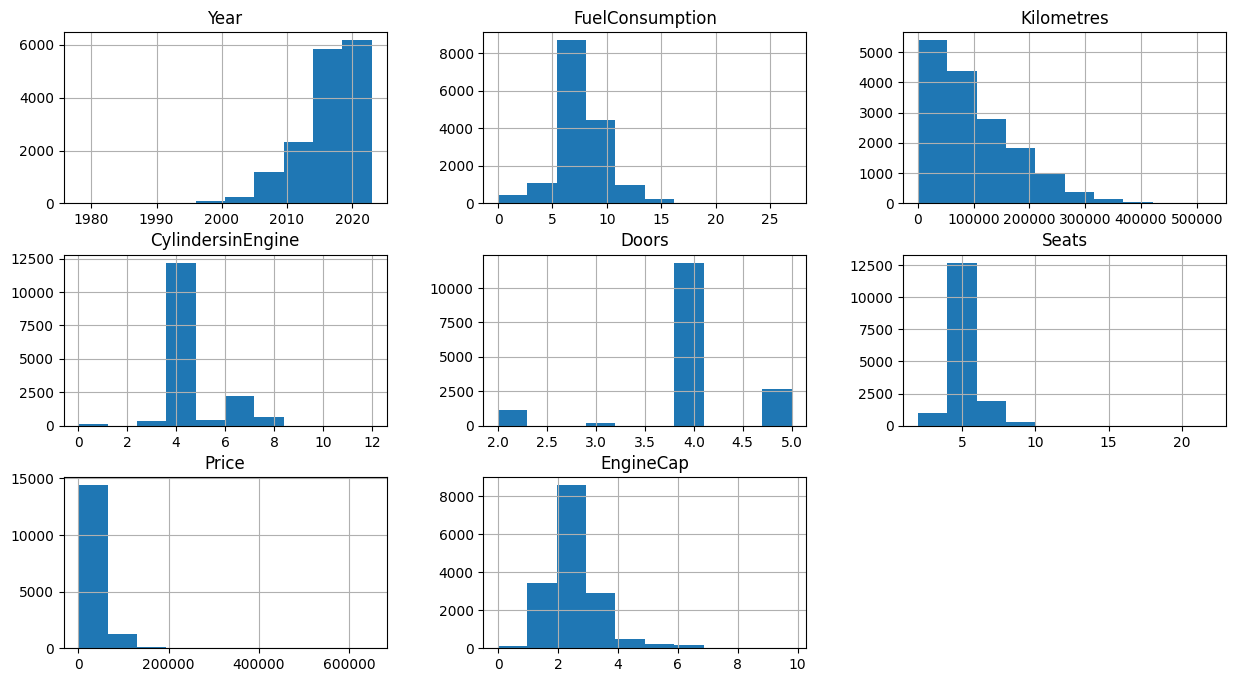

In [1017]:
df.hist(figsize=(15,8))

Kilometres is right skewed (tail extends to the right) and has a considerable range which we might want to normalise.  For both of these reasons we should take the log of the Kilometres, but the range is much higher than other data like 'Doors', so we should normalise the data first.  The Year column is skewed to the left but this is consistent with expectations for a price relationship as the newer vehicles are likely to be more expensive than older vehicles, rather than vehicles just increasing in price over time for the same item during the period being reviewed.  If the period was during high inflation times the interpretation might be different.  There is a case for normalising the data because of the range.

The other data is reasonably shaped so no other modifications are proposed at this point and low range so we shall leave it as is for now.

In [1018]:
#Standardize Year
# Compute mean and standard deviation
mean_year = df['Year'].mean()
std_year = df['Year'].std()

# Normalize the "Year" column
df['Nml_Year'] = (df['Year'] - mean_year) / std_year

#Standardise Kilometers
#1. Deskew with Log
# Compute the natural logarithm of kilometers
df['Log_Kilometres'] = np.log(df['Kilometres']+1)

#2. Normalize
# Compute mean and standard deviation
mean_km = df['Log_Kilometres'].mean()
std_km = df['Log_Kilometres'].std()

# Normalize the "Kilometres" column
df['Log_Nml_Kilometres'] = (df['Log_Kilometres'] - mean_km) / std_km




In [1019]:
#Print the key numbers for field conversion
print("These values will be required later if these columns are used in the model:")
print("mean_year:", mean_year)
print("std_year:", std_year)
print("mean_km:", mean_km)
print("std_km:", std_km)


These values will be required later if these columns are used in the model:
mean_year: 2016.414433636649
std_year: 4.979795252275522
mean_km: 10.332570766800295
std_km: 2.9407762053794992


array([[<Axes: title={'center': 'Log_Kilometres'}>,
        <Axes: title={'center': 'Log_Nml_Kilometres'}>],
       [<Axes: title={'center': 'Nml_Year'}>, <Axes: >]], dtype=object)

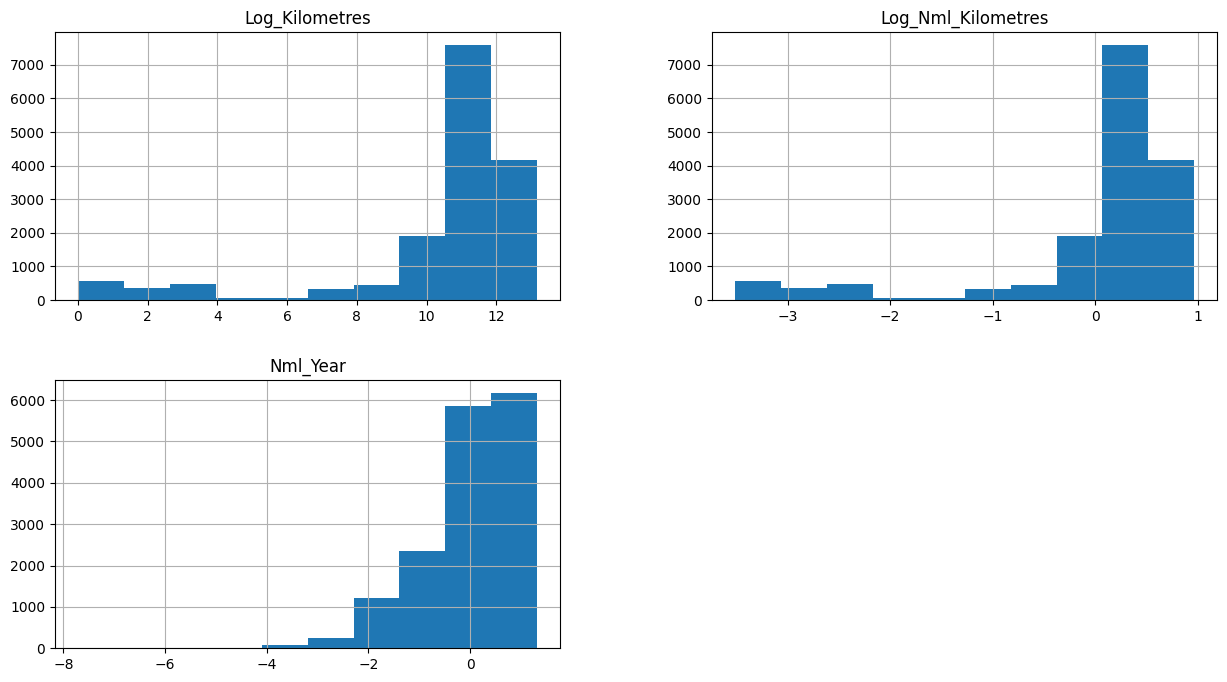

In [1020]:
df.hist(['Log_Kilometres','Log_Nml_Kilometres','Nml_Year'],figsize=(15,8))

## Visual and Statistic Correlation analysis for selection of best features (1 pt) (and the second part of Data Conversion to numeric values for machine learning/predictive analysis (1 pt), as well as Feature Selection based on data distribution (1 pt))

### First correlation map - purely numeric values

Now we'll calculate a correlation (which we will revisit later).

In [1021]:
dfT1 = df[['Year','Nml_Year','Kilometres','Log_Kilometres','Log_Nml_Kilometres','Doors','CylindersinEngine','EngineCap','FuelConsumption','Seats','Price']]
dfT1.corr()

,Year,Nml_Year,Kilometres,Log_Kilometres,Log_Nml_Kilometres,Doors,CylindersinEngine,EngineCap,FuelConsumption,Seats,Price
Year,1.000000,1.000000,-0.770306,-0.586778,-0.586778,0.070873,-0.212676,-0.207165,-0.281975,0.017296,0.421931
Nml_Year,1.000000,1.000000,-0.770306,-0.586778,-0.586778,0.070873,-0.212676,-0.207165,-0.281975,0.017296,0.421931
Kilometres,-0.770306,-0.770306,1.000000,0.624001,0.624001,-0.088950,0.153633,0.226258,0.249295,0.012740,-0.417650
Log_Kilometres,-0.586778,-0.586778,0.624001,1.000000,1.000000,0.028630,0.095755,0.102716,0.198702,0.043948,-0.422149
Log_Nml_Kilometres,-0.586778,-0.586778,0.624001,1.000000,1.000000,0.028630,0.095755,0.102716,0.198702,0.043948,-0.422149
Doors,0.070873,0.070873,-0.088950,0.028630,0.028630,1.000000,-0.233721,-0.314160,-0.171212,0.364564,-0.193566
CylindersinEngine,-0.212676,-0.212676,0.153633,0.095755,0.095755,-0.233721,1.000000,0.824856,0.564914,0.019345,0.324885
EngineCap,-0.207165,-0.207165,0.226258,0.102716,0.102716,-0.314160,0.824856,1.000000,0.568342,0.033388,0.290328
FuelConsumption,-0.281975,-0.281975,0.249295,0.198702,0.198702,-0.171212,0.564914,0.568342,1.000000,0.080016,0.037575
Seats,0.017296,0.017296,0.012740,0.043948,0.043948,0.364564,0.019345,0.033388,0.080016,1.000000,-0.045709


<Axes: >

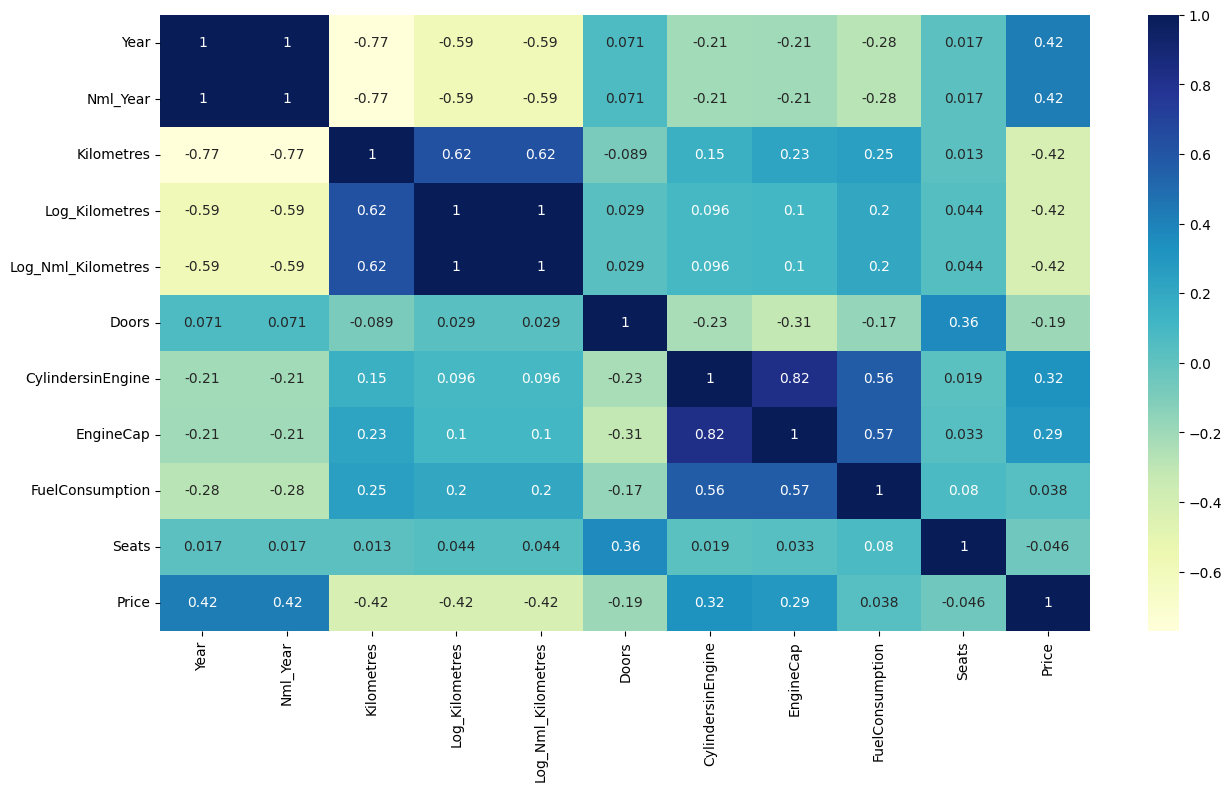

In [1022]:
plt.figure(figsize=(15,8))
sns.heatmap(dfT1.corr(), annot=True, cmap="YlGnBu")

The best correlation with Price is for Year and Kilometres, with a lower correlation for Cylinders and EngineCap, but this view mixes both electic and non-electric cars.  Given the fact that non-elctric cars have zero for engine data, we should probably take a look at these groups seperately.

In [1023]:
dfTNE = df[(df['FuelType'] != 'Electric')][['Year','Nml_Year','Kilometres','Log_Kilometres','Log_Nml_Kilometres','Doors','CylindersinEngine','EngineCap','FuelConsumption','Seats','Price']]
dfTNE.corr()

,Year,Nml_Year,Kilometres,Log_Kilometres,Log_Nml_Kilometres,Doors,CylindersinEngine,EngineCap,FuelConsumption,Seats,Price
Year,1.000000,1.000000,-0.768818,-0.585438,-0.585438,0.070150,-0.197877,-0.195106,-0.271208,0.018964,0.420980
Nml_Year,1.000000,1.000000,-0.768818,-0.585438,-0.585438,0.070150,-0.197877,-0.195106,-0.271208,0.018964,0.420980
Kilometres,-0.768818,-0.768818,1.000000,0.623199,0.623199,-0.088182,0.135145,0.214657,0.237075,0.011222,-0.416722
Log_Kilometres,-0.585438,-0.585438,0.623199,1.000000,1.000000,0.029835,0.072889,0.087379,0.184310,0.042204,-0.420796
Log_Nml_Kilometres,-0.585438,-0.585438,0.623199,1.000000,1.000000,0.029835,0.072889,0.087379,0.184310,0.042204,-0.420796
Doors,0.070150,0.070150,-0.088182,0.029835,0.029835,1.000000,-0.240930,-0.318078,-0.172732,0.365153,-0.199075
CylindersinEngine,-0.197877,-0.197877,0.135145,0.072889,0.072889,-0.240930,1.000000,0.817522,0.524520,0.014439,0.392752
EngineCap,-0.195106,-0.195106,0.214657,0.087379,0.087379,-0.318078,0.817522,1.000000,0.542967,0.030350,0.330478
FuelConsumption,-0.271208,-0.271208,0.237075,0.184310,0.184310,-0.172732,0.524520,0.542967,1.000000,0.078224,0.074208
Seats,0.018964,0.018964,0.011222,0.042204,0.042204,0.365153,0.014439,0.030350,0.078224,1.000000,-0.043795


<Axes: >

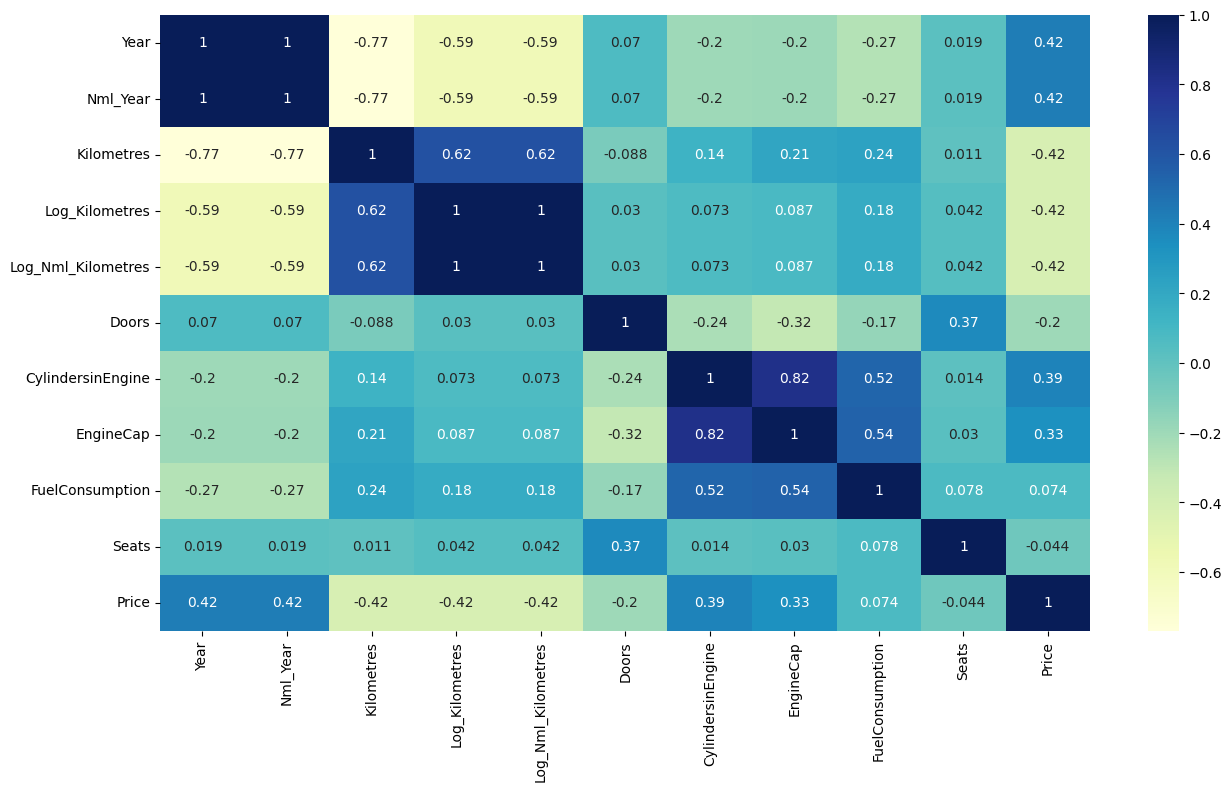

In [1024]:
plt.figure(figsize=(15,8))
sns.heatmap(dfTNE.corr(), annot=True, cmap="YlGnBu")

This has improved the correlation somewhat for CylindersinEngine and EngineCap, but not a lot.  FuelConsumption and Seats remain almost useless, so we will drop them from the model going forward.  Doors are marginally useful at this point so we will keep them in.  It remains problematic how we will deal with the difference in inputs between electric and non-electric vehicles, although the boolean fields yet to be added may assist in this regard.

In [1025]:
dfTE = df[['Nml_Year','Log_Nml_Kilometres','Doors','Seats','Price']]
dfTE.corr()

,Nml_Year,Log_Nml_Kilometres,Doors,Seats,Price
Nml_Year,1.000000,-0.586778,0.070873,0.017296,0.421931
Log_Nml_Kilometres,-0.586778,1.000000,0.028630,0.043948,-0.422149
Doors,0.070873,0.028630,1.000000,0.364564,-0.193566
Seats,0.017296,0.043948,0.364564,1.000000,-0.045709
Price,0.421931,-0.422149,-0.193566,-0.045709,1.000000


<Axes: >

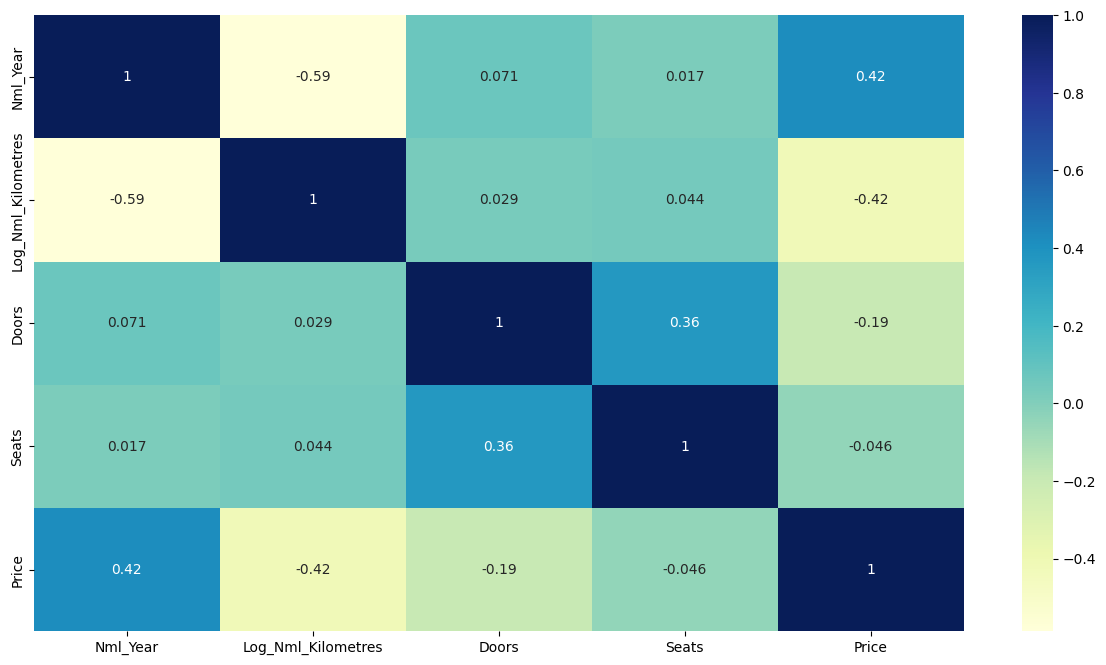

In [1026]:
plt.figure(figsize=(15,8))
sns.heatmap(dfTE.corr(), annot=True, cmap="YlGnBu")

For electric vehicles the best correlations are for Year and Kilometres with Doors coming in third and seats being essentially irrelevant.

### Assembling the regression dataframe (value split)

We will now begin assembling the dataframe for regression.  Starting with the naturally numeric columns and then adding boolean columns drawn from the non numeric columns.

In [1027]:
df.dtypes

Brand                  object
Year                    int64
Model                  object
UsedOrNew              object
Transmission           object
DriveType              object
FuelType               object
FuelConsumption       float64
Kilometres            float64
CylindersinEngine     float64
BodyType               object
Doors                 float64
Seats                 float64
Price                 float64
EngineCap             float64
ColourExt              object
ColourInt              object
LocCity                object
LocState               object
Nml_Year              float64
Log_Kilometres        float64
Log_Nml_Kilometres    float64
dtype: object

Our first take on the regression-ready dataframe is thus (We will need Brand and Model):

In [1028]:
df = df.reset_index()
dfR = df[['Nml_Year','Log_Nml_Kilometres','CylindersinEngine','EngineCap','Doors','Price']]

In [1029]:
dfR

,Nml_Year,Log_Nml_Kilometres,CylindersinEngine,EngineCap,Doors,Price
0,1.121646,-0.579018,4.0,2.2,4.0,51990.0
1,1.121646,-2.550129,4.0,1.5,5.0,19990.0
2,1.121646,-0.437956,4.0,2.0,2.0,108988.0
3,-1.087280,0.507227,8.0,5.5,2.0,32990.0
4,1.121646,-1.152569,4.0,1.3,4.0,34990.0
...,...,...,...,...,...,...
15930,-0.284034,0.194103,4.0,1.6,4.0,21450.0
15931,0.920834,0.024152,4.0,2.0,4.0,36770.0
15932,1.121646,-0.606206,4.0,1.6,4.0,35280.0
15933,-0.083223,0.348209,4.0,2.0,4.0,41888.0


We will now step through the non-numeric fields converting them to boolean fields and adding them to the dataframe.  We will address Brand/Model last as this is the most complex to address as there are too many unique values to make boolean fields, but it is reasonable to expect that they will have a significant impact on price.

#### UsedOrNew

See UsedOrNew's unique values.

In [1030]:
df.UsedOrNew.unique()

array(['DEMO', 'USED', 'NEW'], dtype=object)

Split out UsedOrNew into categories.

In [1031]:
pd.get_dummies(df.UsedOrNew, dtype=int)

,DEMO,NEW,USED
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
15930,0,0,1
15931,0,0,1
15932,1,0,0
15933,0,0,1


Join other columns onto a dataframe with the split values.

In [1032]:
dfR=dfR.join(pd.get_dummies(df.UsedOrNew, dtype=int))


UsedOrNew has now  been value-split.  We will do a similar process of joining the split value columns onto this new dataframe for each column that we'll process.

#### Transmission

In [1033]:
df.Transmission.unique()

array(['Automatic', 'Manual', 'TUnknown'], dtype=object)

In [1034]:
dfR=dfR.join(pd.get_dummies(df.Transmission, dtype=int))

#### DriveType

In [1035]:
df.DriveType.unique()

array(['AWD', 'Front', 'Rear', 'DTOther', '4WD'], dtype=object)

In [1036]:
dfR=dfR.join(pd.get_dummies(df.DriveType, dtype=int))

#### FuelType

In [1037]:
df.FuelType.unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', 'Electric', 'FTOther',
       'FTUnknown', 'LPG', 'Leaded'], dtype=object)

In [1038]:
dfR=dfR.join(pd.get_dummies(df.FuelType, dtype=int))

#### BodyType

In [1039]:
df.BodyType.unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Wagon', 'Ute / Tray',
       'Sedan', 'People Mover', 'Convertible', 'BTOther'], dtype=object)

In [1040]:
dfR=dfR.join(pd.get_dummies(df.BodyType, dtype=int))

#### LocState

In [1041]:
df.LocState.unique()

array(['NSW', 'VIC', 'QLD', 'SA', 'WA', 'ACT', 'TAS', 'NT', 'NoState'],
      dtype=object)

In [1042]:
dfR=dfR.join(pd.get_dummies(df.LocState, dtype=int))

### Second  correlation analysis (with split-value boolean fields)

The result of the complete split values...

In [1043]:
pd.set_option('display.max_columns', dfR.shape[1])
dfR

,Nml_Year,Log_Nml_Kilometres,CylindersinEngine,EngineCap,Doors,Price,DEMO,NEW,USED,Automatic,Manual,TUnknown,4WD,AWD,DTOther,Front,Rear,Diesel,Electric,FTOther,FTUnknown,Hybrid,LPG,Leaded,Premium,Unleaded,BTOther,Commercial,Convertible,Coupe,Hatchback,People Mover,SUV,Sedan,Ute / Tray,Wagon,ACT,NSW,NT,NoState,QLD,SA,TAS,VIC,WA
0,1.121646,-0.579018,4.0,2.2,4.0,51990.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1.121646,-2.550129,4.0,1.5,5.0,19990.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.121646,-0.437956,4.0,2.0,2.0,108988.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-1.087280,0.507227,8.0,5.5,2.0,32990.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.121646,-1.152569,4.0,1.3,4.0,34990.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,-0.284034,0.194103,4.0,1.6,4.0,21450.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
15931,0.920834,0.024152,4.0,2.0,4.0,36770.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15932,1.121646,-0.606206,4.0,1.6,4.0,35280.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15933,-0.083223,0.348209,4.0,2.0,4.0,41888.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


Check correlation again.

In [1044]:
pd.set_option('display.min_rows', dfR.shape[1])
pd.set_option('display.max_rows', dfR.shape[1])
dfR.corr()

,Nml_Year,Log_Nml_Kilometres,CylindersinEngine,EngineCap,Doors,Price,DEMO,NEW,USED,Automatic,Manual,TUnknown,4WD,AWD,DTOther,Front,Rear,Diesel,Electric,FTOther,FTUnknown,Hybrid,LPG,Leaded,Premium,Unleaded,BTOther,Commercial,Convertible,Coupe,Hatchback,People Mover,SUV,Sedan,Ute / Tray,Wagon,ACT,NSW,NT,NoState,QLD,SA,TAS,VIC,WA
Nml_Year,1.000000,-0.586778,-0.212676,-0.207165,0.070873,0.421931,0.211501,0.355379,-0.422778,0.228048,-0.234337,0.044761,-0.062088,0.106743,-0.005737,0.088294,-0.172908,-0.003157,0.080761,0.017472,0.065624,0.164200,-0.034198,-0.106327,0.054116,-0.124261,0.036006,0.003217,-0.062495,-0.027762,-0.042830,-0.015073,0.177921,-0.164113,0.002180,-0.043154,0.009715,-0.050319,-0.009434,0.223377,-0.026772,-0.015118,0.035451,-0.032893,0.031567
Log_Nml_Kilometres,-0.586778,1.000000,0.095755,0.102716,0.028630,-0.422149,-0.265579,-0.845792,0.871510,-0.082283,0.089915,-0.062814,0.080049,-0.052599,-0.029679,-0.040528,0.042617,0.055444,-0.084699,-0.025967,-0.151721,-0.097663,0.018641,0.009018,-0.086105,0.090596,-0.057393,-0.045216,-0.025236,-0.017008,0.048542,-0.000345,-0.099717,0.090146,0.023768,0.030642,0.022312,0.057372,0.011469,-0.593476,0.008655,0.032588,0.007822,0.080123,0.066400
CylindersinEngine,-0.212676,0.095755,1.000000,0.824856,-0.233721,0.324885,-0.065369,-0.045966,0.076215,-0.007106,0.009812,-0.023236,0.118935,0.033799,0.002908,-0.316284,0.274232,0.026890,-0.323456,-0.015359,0.000138,-0.040914,0.043456,0.043774,0.120138,-0.057335,-0.007028,-0.040450,0.062133,0.162133,-0.192756,-0.012420,-0.009078,0.093229,0.045807,0.036265,-0.007861,0.008964,-0.007795,0.013007,-0.034170,0.008983,-0.021350,0.006743,0.017850
EngineCap,-0.207165,0.102716,0.824856,1.000000,-0.314160,0.290328,-0.084598,-0.034235,0.077106,-0.057281,0.059731,-0.018814,0.272679,0.003029,0.018498,-0.471440,0.345694,0.191083,-0.213884,-0.026240,-0.012412,-0.033114,0.048146,0.044067,-0.015357,-0.117722,-0.003602,0.031588,0.022044,0.104209,-0.332749,0.014762,-0.040749,0.091265,0.243229,0.014258,-0.022106,-0.006041,0.001268,0.065404,-0.035017,0.010310,-0.018572,-0.003529,0.031321
Doors,0.070873,0.028630,-0.233721,-0.314160,1.000000,-0.193566,0.012905,-0.055233,0.039779,0.177394,-0.177398,-0.007724,-0.108897,0.037000,0.002990,0.315898,-0.368951,-0.187333,0.019317,0.022119,0.018112,0.144280,-0.035822,-0.011621,-0.042031,0.146227,-0.038635,-0.141219,-0.248805,-0.397910,0.477677,-0.047586,0.045525,-0.001631,-0.270667,0.009168,0.007986,0.018012,0.004493,-0.140442,0.000672,0.020979,-0.000436,0.010956,0.011088
Price,0.421931,-0.422149,0.324885,0.290328,-0.193566,1.000000,0.132162,0.271507,-0.306334,0.077239,-0.092356,0.128173,0.060539,0.191999,0.013979,-0.264366,0.080978,0.085226,0.120899,-0.001837,0.050749,0.119887,-0.019034,0.024637,0.165267,-0.288370,0.040189,0.045118,0.105945,0.195999,-0.178974,0.017532,0.058074,-0.039908,0.030158,-0.024523,-0.013927,-0.023873,-0.004808,0.326108,-0.060110,-0.032587,0.001080,-0.024324,-0.000359
DEMO,0.211501,-0.265579,-0.065369,-0.084598,0.012905,0.132162,1.000000,-0.049367,-0.524339,0.049615,-0.055891,0.052443,-0.027854,0.052555,0.046911,0.003487,-0.059106,-0.062579,0.062329,0.003634,0.027385,0.038257,-0.005439,-0.002807,0.093839,-0.047541,0.031754,-0.021626,-0.011693,-0.013732,-0.045383,-0.005790,0.083974,-0.030847,-0.040315,0.024523,-0.005552,0.033266,0.003458,-0.029926,0.021870,0.011706,0.027414,-0.029444,-0.038761
NEW,0.355379,-0.845792,-0.045966,-0.034235,-0.055233,0.271507,-0.049367,1.000000,-0.824586,0.031040,-0.035264,0.035396,-0.026001,0.005673,0.037357,0.001477,0.000285,0.020571,0.031305,0.016639,0.150810,0.018720,-0.008553,-0.004415,0.023112,-0.068989,0.046945,0.067362,0.021711,0.000821,-0.064495,0.005764,0.052890,-0.075708,0.030078,-0.015134,-0.023705,-0.067657,-0.019416,0.606195,0.013160,-0.030093,-0.030153,-0.070607,-0.086863
USED,-0.422778,0.871510,0.076215,0.077106,0.039779,-0.306334,-0.524339,-0.824586,1.000000,-0.054567,0.061722,-0.059882,0.037944,-0.034605,-0.058420,-0.003234,0.033236,0.017909,-0.061994,

From the above correlation calculation, only a small number of the fields are worth using: Nml_Year, BrandMdlID, Log_Nml_Kilometres, CylindersinEngine and EngineCap.

<Axes: >

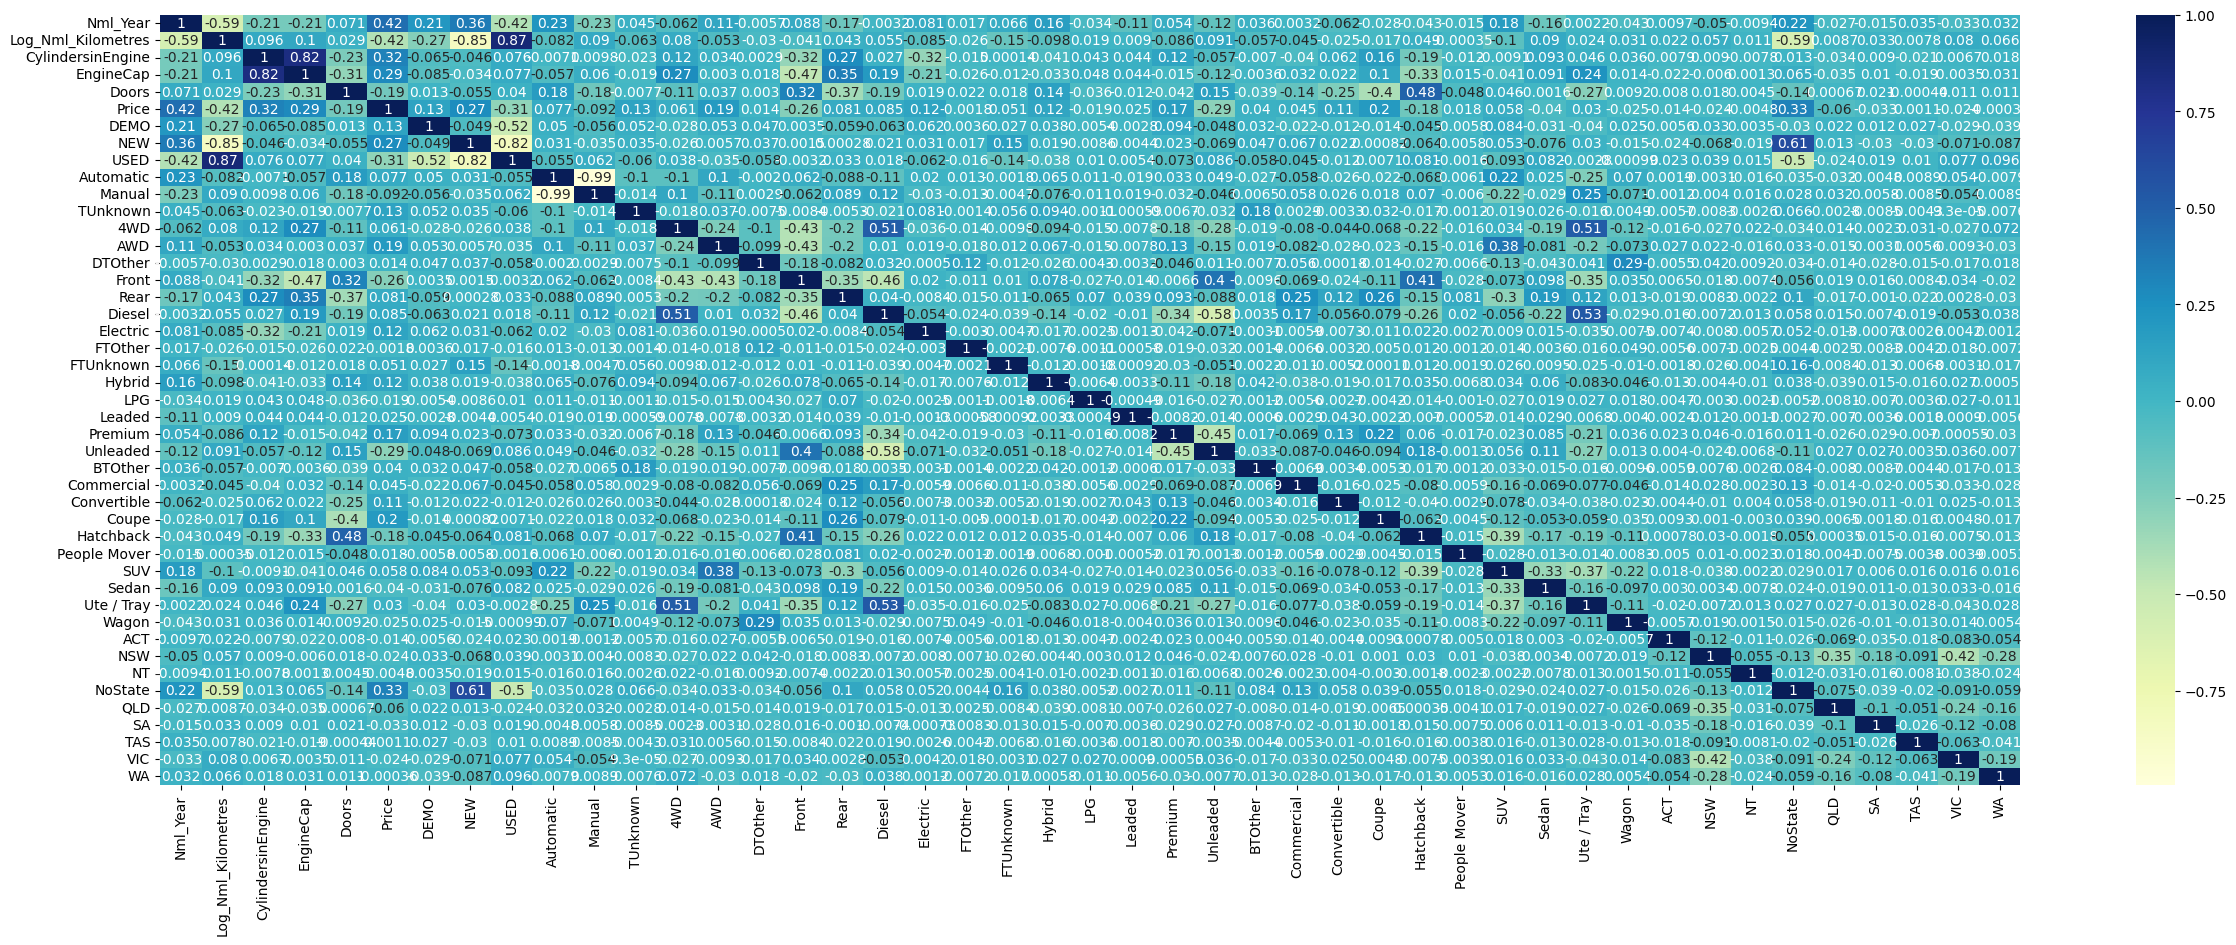

In [1045]:
plt.figure(figsize=(30,10))
sns.heatmap(dfR.corr(), annot=True, cmap="YlGnBu")

In [1046]:
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 0)

Correlations are still pretty weak, but there are some additional relations between New/Used, BodyType and FuelType that may be useable, although KM and Year remain the strongest associations.

### Processing Brand and Model

Brand and Model can't be used in their current form (non-numeric), and there are too many of them to use as boolean fields.  Converting to a straight lookup field with no other consideration would not be expected to provide any correlation.  So, I propose to sort Brand and Model by the mean of the car prices for that combination, index them in that order and then replace the fields with the indexed lookup tables new indexID, thus putting Brand/Model into an ascending price relationship.

In [1047]:
# Calculate mean price by brand and model
mean_prices = df.groupby(['Brand', 'Model'])['Price'].mean()

# Sort the data by mean price
sorted_df = mean_prices.reset_index().sort_values(by='Price')

# Create an index for the sorted order
sorted_df['BrandMdlID'] = range(1, len(sorted_df) + 1)

# Merge the original DataFrame with the sorted DataFrame
merged_df = pd.merge(df, sorted_df[['Brand', 'Model', 'BrandMdlID']], on=['Brand', 'Model'], how='left')

# Specify the column to move
column_to_move = 'BrandMdlID'

# Get the current column order
current_columns = merged_df.columns.tolist()

# Move the specified column to the desired position (e.g., second position)
desired_position = 3
current_columns.remove(column_to_move)
current_columns.insert(desired_position, column_to_move)

# Reindex the DataFrame with the updated column order
df = merged_df.reindex(columns=current_columns)

#Now copy the column across to the new regression dataframe
ExtractBranModelId = df['BrandMdlID']

# Insert the extracted column at a specific position in dfR
position_to_insert = 1  
dfR.insert(position_to_insert, 'BrandMdlID', ExtractBranModelId)

dfR


,Nml_Year,BrandMdlID,Log_Nml_Kilometres,CylindersinEngine,EngineCap,Doors,Price,DEMO,NEW,USED,Automatic,Manual,TUnknown,4WD,AWD,DTOther,Front,Rear,Diesel,Electric,FTOther,FTUnknown,Hybrid,LPG,Leaded,Premium,Unleaded,BTOther,Commercial,Convertible,Coupe,Hatchback,People Mover,SUV,Sedan,Ute / Tray,Wagon,ACT,NSW,NT,NoState,QLD,SA,TAS,VIC,WA
0,1.121646,450,-0.579018,4.0,2.2,4.0,51990.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1.121646,167,-2.550129,4.0,1.5,5.0,19990.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.121646,478,-0.437956,4.0,2.0,2.0,108988.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-1.087280,238,0.507227,8.0,5.5,2.0,32990.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.121646,402,-1.152569,4.0,1.3,4.0,34990.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,-0.284034,221,0.194103,4.0,1.6,4.0,21450.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
15931,0.920834,282,0.024152,4.0,2.0,4.0,36770.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15932,1.121646,257,-0.606206,4.0,1.6,4.0,35280.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15933,-0.083223,430,0.348209,4.0,2.0,4.0,41888.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1048]:
merged_df


,index,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,EngineCap,ColourExt,ColourInt,LocCity,LocState,Nml_Year,Log_Kilometres,Log_Nml_Kilometres,BrandMdlID
0,0,Ssangyong,2022,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,2.2,White,Black,Caringbah,NSW,1.121646,8.629807,-0.579018,450
1,1,MG,2022,MG3,USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,1.5,Black,Black,Brookvale,NSW,1.121646,2.833213,-2.550129,167
2,2,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,2.0,Grey,White,Sylvania,NSW,1.121646,9.044640,-0.437956,478
3,3,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,5.5,White,Brown,Mount Druitt,NSW,-1.087280,11.824212,0.507227,238
4,4,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,1.3,Grey,Black,Castle Hill,NSW,1.121646,6.943122,-1.152569,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,16663,Hyundai,2015,I30,USED,Automatic,Front,Unleaded,6.9,54359.0,4.0,Wagon,4.0,5.0,21450.0,1.6,Silver,Black,Oakleigh South,VIC,-0.284034,10.903384,0.194103,221
15931,16664,Nissan,2021,Qashqai,USED,Automatic,Front,Unleaded,6.9,32977.0,4.0,SUV,4.0,5.0,36770.0,2.0,White,-,Rocklea,QLD,0.920834,10.403596,0.024152,282
15932,16667,Suzuki,2022,Vitara,DEMO,Automatic,Front,Unleaded,6.2,5165.0,4.0,SUV,4.0,5.0,35280.0,1.6,Yellow,-,Dinmore,QLD,1.121646,8.549854,-0.606206,257
15933,16668,Mercedes-Benz,2016,GLC250,USED,Automatic,AWD,Premium,7.2,85525.0,4.0,SUV,4.0,5.0,41888.0,2.0,Grey,Black,Albion,QLD,-0.083223,11.356576,0.348209,430


Modifications to the data itself have now been completed.

### Write conversion parameters to disk (and summary)

Some values used to create the Brand Model lookup table and the normalised data will be required in the production program to prepare user data. 
We shall write the brand-model look up table, etc to disk for use in the production app.

In [1049]:
data = {
    'mean_year': [mean_year],
    'std_year': [std_year],
    'mean_km': [mean_km],
    'std_km': [std_km]
}

norm_df = pd.DataFrame(data)
norm_df.to_csv('normalparams.csv')
sorted_df.to_csv('BrandModelLU.csv')

Resummarise the data cleaning process - first, the original df for comparison.

In [1050]:
df.dtypes

index                   int64
Brand                  object
Year                    int64
BrandMdlID              int64
Model                  object
UsedOrNew              object
Transmission           object
DriveType              object
FuelType               object
FuelConsumption       float64
Kilometres            float64
CylindersinEngine     float64
BodyType               object
Doors                 float64
Seats                 float64
Price                 float64
EngineCap             float64
ColourExt              object
ColourInt              object
LocCity                object
LocState               object
Nml_Year              float64
Log_Kilometres        float64
Log_Nml_Kilometres    float64
dtype: object

In [1051]:
df.isnull().sum()

index                 0
Brand                 0
Year                  0
BrandMdlID            0
Model                 0
UsedOrNew             0
Transmission          0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
CylindersinEngine     0
BodyType              0
Doors                 0
Seats                 0
Price                 0
EngineCap             0
ColourExt             0
ColourInt             0
LocCity               0
LocState              0
Nml_Year              0
Log_Kilometres        0
Log_Nml_Kilometres    0
dtype: int64

And now the final set of data.

In [1052]:
merged_df.dtypes

index                   int64
Brand                  object
Year                    int64
Model                  object
UsedOrNew              object
Transmission           object
DriveType              object
FuelType               object
FuelConsumption       float64
Kilometres            float64
CylindersinEngine     float64
BodyType               object
Doors                 float64
Seats                 float64
Price                 float64
EngineCap             float64
ColourExt              object
ColourInt              object
LocCity                object
LocState               object
Nml_Year              float64
Log_Kilometres        float64
Log_Nml_Kilometres    float64
BrandMdlID              int64
dtype: object

In [1053]:
merged_df.isnull().sum()

index                 0
Brand                 0
Year                  0
Model                 0
UsedOrNew             0
Transmission          0
DriveType             0
FuelType              0
FuelConsumption       0
Kilometres            0
CylindersinEngine     0
BodyType              0
Doors                 0
Seats                 0
Price                 0
EngineCap             0
ColourExt             0
ColourInt             0
LocCity               0
LocState              0
Nml_Year              0
Log_Kilometres        0
Log_Nml_Kilometres    0
BrandMdlID            0
dtype: int64

View the data itself and export it to file.

In [1054]:
pd.reset_option('display.max_rows')
dfR.to_csv('cleandata3.csv')
dfR[['BrandMdlID', 'Nml_Year', 'Log_Nml_Kilometres', 'CylindersinEngine', 'EngineCap', 'NEW', 'USED', 'Unleaded', 'Price']]

,BrandMdlID,Nml_Year,Log_Nml_Kilometres,CylindersinEngine,EngineCap,NEW,USED,Unleaded,Price
0,450,1.121646,-0.579018,4.0,2.2,0,0,0,51990.0
1,167,1.121646,-2.550129,4.0,1.5,0,1,0,19990.0
2,478,1.121646,-0.437956,4.0,2.0,0,1,0,108988.0
3,238,-1.087280,0.507227,8.0,5.5,0,1,0,32990.0
4,402,1.121646,-1.152569,4.0,1.3,0,1,1,34990.0
...,...,...,...,...,...,...,...,...,...
15930,221,-0.284034,0.194103,4.0,1.6,0,1,1,21450.0
15931,282,0.920834,0.024152,4.0,2.0,0,1,1,36770.0
15932,257,1.121646,-0.606206,4.0,1.6,0,0,1,35280.0
15933,430,-0.083223,0.348209,4.0,2.0,0,1,0,41888.0


## Training/Testing Sampling and K-fold cross validation (1 pt) (and Investigating multiple Regression algorithms (2 pts))
In order to develop a model for predicting the value of a dependant variable given a range of independent variables, we will need to train a training model on said independent variables.  There are several different models available and differing methods to train with such models, so this section shall be dedicated to finding and training the ideal model for our scenario.

Each model always has a basic procedure for training:
* select the independent variables for the x axis and the dependent variable for the y axis;
* split the data into randomised selections for a training set and testing set (the exact percentage depends on the training method);
* train (fit) the training model to the training data;
* test the training model by getting it to predict the values of the dependent variable with specific values of the independent variables provided by selections from the testing data; and
* determine the effectiveness (note: not the accuracy) of the model, done by comparing the mean squared error and the coefficient of determination to other model, the latter being the proportion of total variation in the dependent variable that is explained by independent variables.  Generally, a better model has a lower mean squared error and, more essentially, a higher coefficient of determination, with 1 for the latter implying a 100% accurate model.

The different training methods (distinct from models) build upon this basic method slightly.
* The most basic method does it once per model as above; and
* K-fold cross validation divides the dataset into sections, gradually training the dataset on every section (with sections not being trained each iteration being used for testing instead (or, potentially, validation instead if it's the immediately preceding one)).  For example, 2-fold cross validation trains one half of the dataset and tests the other for one iteration, and then flips them (perhaps making the testing one validation) for the next.  We will be doing 10-fold cross validation.

### Setup

In [1055]:
# General (except KFold)
from sklearn.model_selection import (train_test_split, KFold)
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Specific to k-fold Cross Validation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Prepare features (X) and target (y)
X = dfR[['BrandMdlID', 'Nml_Year', 'Log_Nml_Kilometres', 'CylindersinEngine', 'EngineCap', 'NEW', 'USED', 'Unleaded']]
y = dfR['Price']

### Basic method

Linear Regression.

In [1056]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error: 679663799.17
Coefficient of determination (R-squared): 0.51


Ridge Regression.

In [1057]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value (regularization strength)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error (MSE): 679675114.80
Coefficient of determination (R-squared): 0.51


Lasso Regression.

In [1058]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value (regularization strength)
lasso_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error (MSE): 679666455.92
Coefficient of determination (R-squared): 0.51


Elastic-Net Regression.

In [1059]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Elastic-Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error (MSE): 717106692.35
Coefficient of determination (R-squared): 0.48


Random Forest Regression.

In [1060]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error (MSE): 111618648.39
Coefficient of determination (R-squared): 0.92


Decision Tree Regression.

In [1061]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=5)  # You can adjust the max_depth
tree_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Coefficient of determination (R-squared): {r2:.2f}")

Mean squared error (MSE): 279203581.73
Coefficient of determination (R-squared): 0.80


### 10-fold cross validation

(Thanks in large part to https://vitalflux.com/k-fold-cross-validation-python-example/ !)

Linear Regression.

In [1062]:
# Create and set up the Linear Regression model and its pipeline
linearPipeline = make_pipeline(StandardScaler(), LinearRegression())

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    linearPipeline.fit(X.iloc[train, :], y.iloc[train])
    score = linearPipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = linearPipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.516
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.514
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.531
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.532
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.559
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.574
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.462
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.594
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.644
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.457

Cross-Validation accuracy: 0.538 +/- 0.054

Final mean squared error: 558834673.58
Final coefficient of determination (R-squared): 0.54


Ridge Regression.

In [1063]:
# Create and set up the Ridge Regression model and its pipeline
ridgePipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))  # You can adjust the alpha value (regularization strength)

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    ridgePipeline.fit(X.iloc[train, :], y.iloc[train])
    score = ridgePipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = ridgePipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.516
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.514
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.531
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.532
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.559
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.574
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.462
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.594
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.644
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.457

Cross-Validation accuracy: 0.538 +/- 0.054

Final mean squared error: 558840782.55
Final coefficient of determination (R-squared): 0.54


Lasso Regression.

In [1064]:
# Create and set up the Lasso Regression model and its pipeline
lassoPipeline = make_pipeline(StandardScaler(), Lasso(alpha=1.0))  # You can adjust the alpha value (regularization strength)

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    lassoPipeline.fit(X.iloc[train, :], y.iloc[train])
    score = lassoPipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = lassoPipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.516
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.514
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.531
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.532
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.559
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.574
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.462
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.594
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.644
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.457

Cross-Validation accuracy: 0.538 +/- 0.054

Final mean squared error: 558839990.30
Final coefficient of determination (R-squared): 0.54


Elastic-Net Regression.

In [1065]:
# Create and set up the Elastic-Net Regression model and its pipeline
elasticNetPipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5))  # You can adjust alpha and l1_ratio

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    elasticNetPipeline.fit(X.iloc[train, :], y.iloc[train])
    score = elasticNetPipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = elasticNetPipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.504
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.473
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.450
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.499
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.544
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.596
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.437
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.601
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.630
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.389

Cross-Validation accuracy: 0.512 +/- 0.075

Final mean squared error: 622399555.69
Final coefficient of determination (R-squared): 0.49


Random Forest Regression.

In [1066]:
# Create and set up the Random Forest Regression model and its pipeline
rfPipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))  # You can adjust hyperparameters

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    rfPipeline.fit(X.iloc[train, :], y.iloc[train])
    score = rfPipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = rfPipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.892
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.898
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.906
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.917
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.891
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.903
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.923
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.904
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.919
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.896

Cross-Validation accuracy: 0.905 +/- 0.011

Final mean squared error: 51291960.67
Final coefficient of determination (R-squared): 0.96


Decision Tree Regression.

In [1067]:
# Create and set up the Decision Tree Regression model and its pipeline
dTreePipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=5))  # You can adjust the max_depth

# Initialise k-Fold
kFoldObject = KFold(n_splits=10)
kfold = kFoldObject.split(X, y)
scores = []

# Loop through each fold, training and testing different data each iteration
for k, (train, test) in enumerate(kfold):
    dTreePipeline.fit(X.iloc[train, :], y.iloc[train])
    score = dTreePipeline.score(X.iloc[test, :], y.iloc[test])
    
    # Make immediate accuracy predictions on the testing set
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y.iloc[train]), score))

print('\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Make predictions on the testing set
y_pred = dTreePipeline.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\nFinal mean squared error: {mse:.2f}")
print(f"Final coefficient of determination (R-squared): {r2:.2f}")

Fold:  1, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.758
Fold:  2, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.785
Fold:  3, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.791
Fold:  4, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.794
Fold:  5, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.759
Fold:  6, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.736
Fold:  7, Training/Test Split Distribution: [0 0 0 ... 0 0 1], Accuracy: 0.774
Fold:  8, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.724
Fold:  9, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.811
Fold: 10, Training/Test Split Distribution: [0 0 0 ... 0 0 2], Accuracy: 0.875

Cross-Validation accuracy: 0.781 +/- 0.040

Final mean squared error: 194307307.99
Final coefficient of determination (R-squared): 0.84


## Selection of the best Model (1 pt)

The best model - that is, the model with the highest coefficient of determination - is Random Forests.  Under the basic training method it is 92% effective at its prediction, but under the full 10-fold cross validation model, it is an astounding 96%.

(Note that personal trial and error revealed that stopping at the 9th fold of the 10 folds actually results in 98% effectiveness, but I decided not to persue this over the risk of that being an artefact of overtraining.)

Save the best model.

In [1068]:
from joblib import dump, load

# Assuming you have a trained model 'model'
filename = 'RF_CarPricing_trained_model.joblib'
dump(rfPipeline, filename)

#To Load call: loaded_model = load(filename)

['RF_CarPricing_trained_model.joblib']

## Deployment of the best model in production (2 pts)
Some random test examples of the model in action (feel free to click play on the code below to try out yourself).

In [1076]:
import random

for _ in range(0, 5):
    # Create a random index
    randomindex = random.randint(0, y.shape[0]-1)
    print(f"Index chosen ~ {randomindex}")
    
    # Create a feature vector 
    new_observation = {
        'BrandMdlID': X.loc[randomindex, 'BrandMdlID'],
        'Nml_Year': X.loc[randomindex, 'Nml_Year'],
        'Log_Nml_Kilometres': X.loc[randomindex, 'Log_Nml_Kilometres'],
        'CylindersinEngine': X.loc[randomindex, 'CylindersinEngine'],
        'EngineCap': X.loc[randomindex, 'EngineCap'],
        'NEW': X.loc[randomindex, 'NEW'],
        'USED': X.loc[randomindex, 'USED'],
        'Unleaded': X.loc[randomindex, 'Unleaded']
    }
    # Convert the dictionary to a pandas DataFrame
    # features = [brand, year, kilometres, CylindersinEngine, Engine_Cap, NewChk, UsedChk, UnleadedChk]
    features = pd.DataFrame([new_observation])
    
    # Predict using model and report prediction
    randomprediction = rfPipeline.predict(features)[0]
    print(f"Predicted Price: ${randomprediction:.2f}")
    print(f"Actual Price: ${y.loc[randomindex]:.2f}")
    print("\n")
    

Index chosen ~ 4611
Predicted Price: $35728.88
Actual Price: $38990.00


Index chosen ~ 12692
Predicted Price: $49859.78
Actual Price: $47990.00


Index chosen ~ 10622
Predicted Price: $10093.69
Actual Price: $5999.00


Index chosen ~ 1007
Predicted Price: $10996.51
Actual Price: $10990.00


Index chosen ~ 12202
Predicted Price: $52599.67
Actual Price: $52880.00




See also below.

## GUI/WEB Deployment using either tkinter/Flask/Streamlit (5 pts)
See 'model-tester.py'.